In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns

/Users/dhanushlalitha/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Load the data
df = pd.read_csv("../data/cleaned_data.csv", encoding = "ISO-8859-1")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,loan_amnt,term (months),int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36,13.99,123.03,C4,10.0,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,5.91,2003,675,679,7,0,2765.0,29.7,13,Whole Funded,Individual,1.0,0.0
1,24700.0,36,11.99,820.28,C1,10.0,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,SD,16.06,1999,715,719,22,0,21470.0,19.2,38,Whole Funded,Individual,4.0,0.0
2,20000.0,60,10.78,432.66,B4,10.0,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,10.78,2000,695,699,6,0,7869.0,56.2,18,Whole Funded,Joint App,5.0,0.0
3,10400.0,60,22.45,289.91,F1,3.0,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,25.37,1998,695,699,12,0,21929.0,64.5,35,Whole Funded,Individual,6.0,0.0
4,11950.0,36,13.44,405.18,C3,4.0,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,10.20,1987,690,694,5,0,8822.0,68.4,6,Whole Funded,Individual,0.0,0.0


# Data Preprcessing

In [6]:
# # Add credit score buckets

# score_bins = [0, 579, 669, 739, 799, float('inf')]
# score_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
# # Creating a new column 'credit_score_bucket' based on FICO scores
# df['credit_score_cat'] = pd.cut(df['fico_range_low'], bins=score_bins, labels=score_labels)


In [7]:
# # Calculate the Monthly Income
# df['monthly_income'] = df['annual_inc'] / 12

# # Calculate the Payment-to-Income Ratio
# df['payment_to_income_ratio (%)'] = (df['installment'] / df['monthly_income']) * 100

In [8]:
df.head()

,loan_amnt,term (months),int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36,13.99,123.03,C4,10.0,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,5.91,2003,675,679,7,0,2765.0,29.7,13,Whole Funded,Individual,1.0,0.0
1,24700.0,36,11.99,820.28,C1,10.0,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,SD,16.06,1999,715,719,22,0,21470.0,19.2,38,Whole Funded,Individual,4.0,0.0
2,20000.0,60,10.78,432.66,B4,10.0,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,10.78,2000,695,699,6,0,7869.0,56.2,18,Whole Funded,Joint App,5.0,0.0
3,10400.0,60,22.45,289.91,F1,3.0,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,25.37,1998,695,699,12,0,21929.0,64.5,35,Whole Funded,Individual,6.0,0.0
4,11950.0,36,13.44,405.18,C3,4.0,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,10.20,1987,690,694,5,0,8822.0,68.4,6,Whole Funded,Individual,0.0,0.0


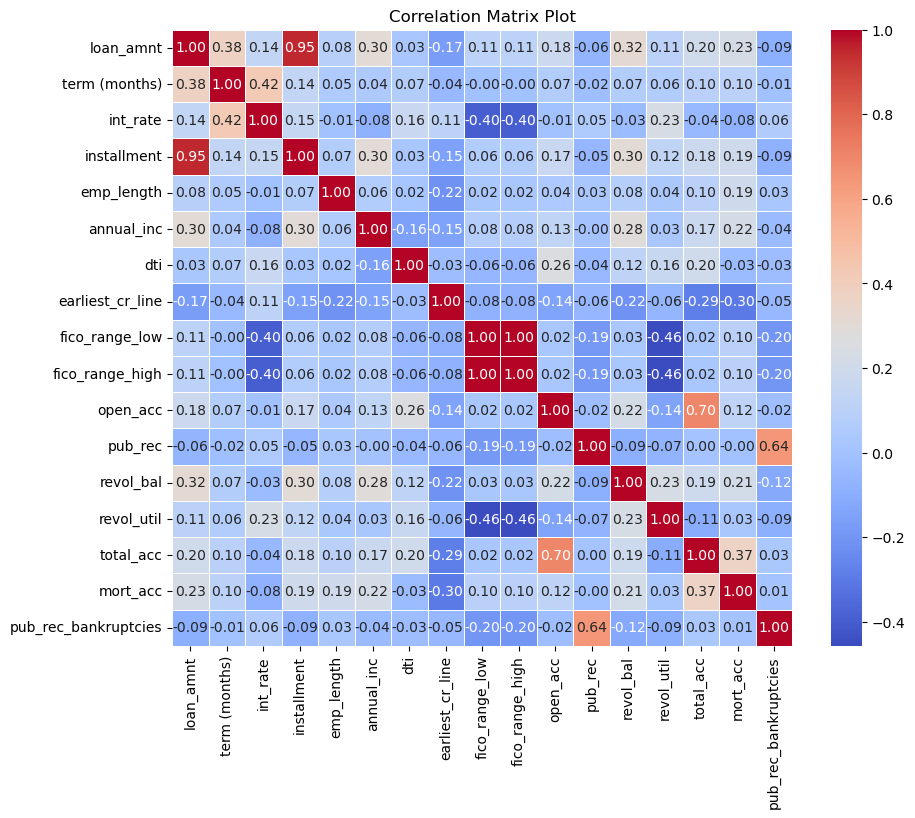

In [9]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Plot')
plt.show()

1. installment and loan_amt show almost perfect correlation here
2. AS expected monthly income and annual inc show perfect correlation
3. open acc and total_acc high correlation
4. pub_rec_bankruptcies and pub rec - pub_rec_bankruptcies was dropped


## Exploratory Data Analysis

We begin by exploring each varibale, plot it and compare it with loan status

In [10]:
df1 = df.copy()
df1['loan_status'] = pd.get_dummies(df1['loan_status'], drop_first=True)

In [11]:
df1.head()

,loan_amnt,term (months),int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36,13.99,123.03,C4,10.0,MORTGAGE,55000.0,Not Verified,Dec-2015,True,debt_consolidation,PA,5.91,2003,675,679,7,0,2765.0,29.7,13,Whole Funded,Individual,1.0,0.0
1,24700.0,36,11.99,820.28,C1,10.0,MORTGAGE,65000.0,Not Verified,Dec-2015,True,small_business,SD,16.06,1999,715,719,22,0,21470.0,19.2,38,Whole Funded,Individual,4.0,0.0
2,20000.0,60,10.78,432.66,B4,10.0,MORTGAGE,63000.0,Not Verified,Dec-2015,True,home_improvement,IL,10.78,2000,695,699,6,0,7869.0,56.2,18,Whole Funded,Joint App,5.0,0.0
3,10400.0,60,22.45,289.91,F1,3.0,MORTGAGE,104433.0,Source Verified,Dec-2015,True,major_purchase,PA,25.37,1998,695,699,12,0,21929.0,64.5,35,Whole Funded,Individual,6.0,0.0
4,11950.0,36,13.44,405.18,C3,4.0,RENT,34000.0,Source Verified,Dec-2015,True,debt_consolidation,GA,10.20,1987,690,694,5,0,8822.0,68.4,6,Whole Funded,Individual,0.0,0.0


In [12]:
non_numeric_columns = df1.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
['sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']


In [13]:
numeric_columns = df1.drop(columns=non_numeric_columns)

In [14]:
numeric_columns.head()

,loan_amnt,term (months),int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,3600.0,36,13.99,123.03,10.0,55000.0,5.91,2003,675,679,7,0,2765.0,29.7,13,1.0,0.0
1,24700.0,36,11.99,820.28,10.0,65000.0,16.06,1999,715,719,22,0,21470.0,19.2,38,4.0,0.0
2,20000.0,60,10.78,432.66,10.0,63000.0,10.78,2000,695,699,6,0,7869.0,56.2,18,5.0,0.0
3,10400.0,60,22.45,289.91,3.0,104433.0,25.37,1998,695,699,12,0,21929.0,64.5,35,6.0,0.0
4,11950.0,36,13.44,405.18,4.0,34000.0,10.20,1987,690,694,5,0,8822.0,68.4,6,0.0,0.0


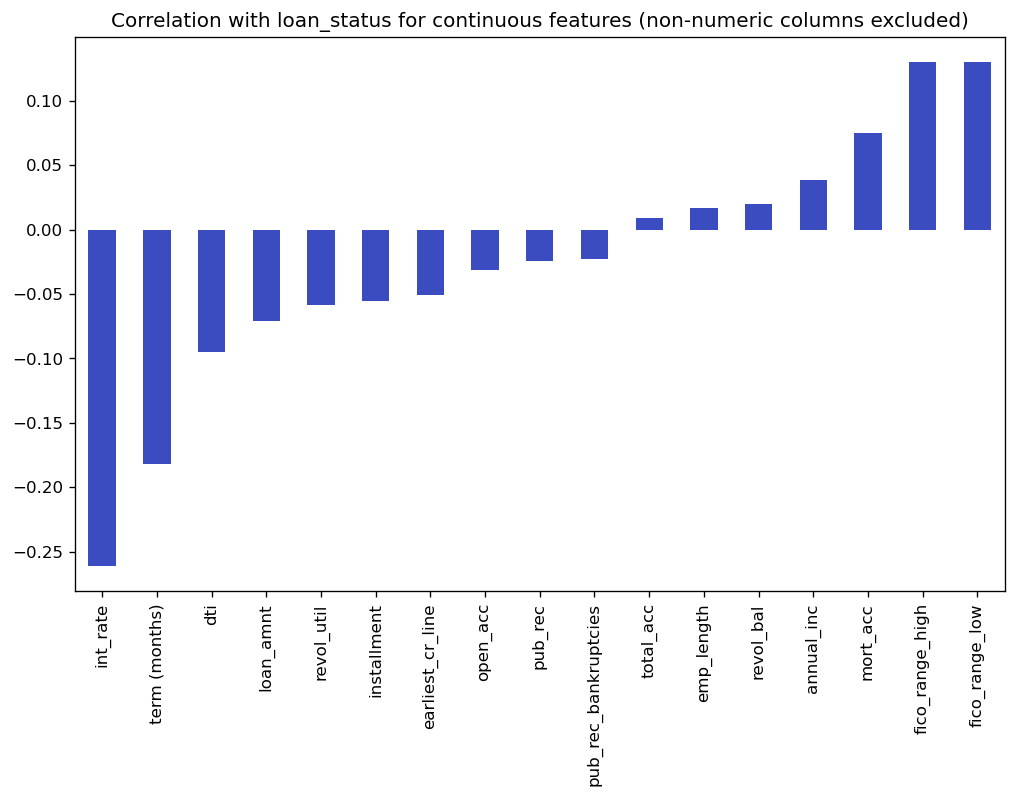

In [16]:
non_numeric_columns = ['sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'initial_list_status', 'application_type']

# Filter out non-numeric columns
numeric_columns = df1.drop(columns=non_numeric_columns)

# Calculate the correlation
correlation = numeric_columns.corr()['loan_status']

# Plot the correlations
plt.figure(figsize=(10, 6), dpi=120)
correlation.sort_values().drop('loan_status').plot(kind='bar', cmap='coolwarm')
plt.title('Correlation with loan_status for continuous features (non-numeric columns excluded)')
plt.xticks(rotation=90)
plt.show()


#int_rate, fico_range_high and fico_range_low are highly correlated with loan_status compared to other features.

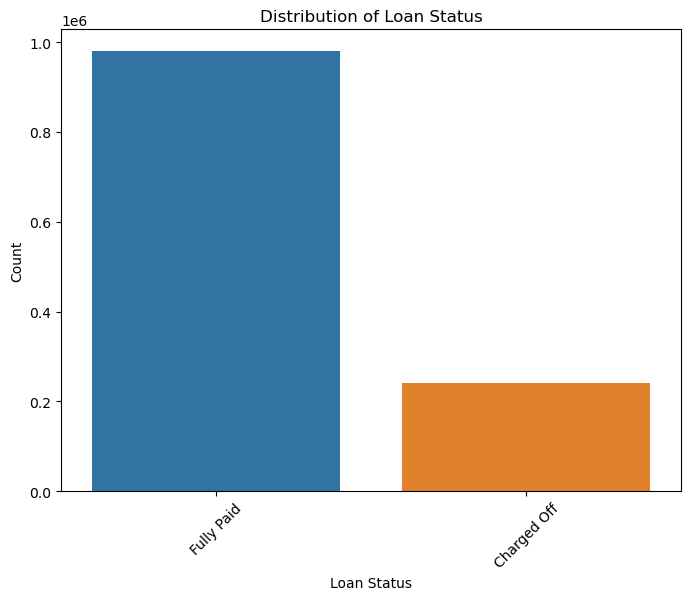

In [17]:
# Plot the distribution of loan status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [18]:
import numpy as np

def visualize_each_variable(col_name, full_name, continuous, df):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=90)
    
     # Plot the variable without considering loan status
    if continuous:
        # For continuous variables, plot a histogram
        sns.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        # For categorical variables, plot a countplot
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)  # Set the x-axis label
    ax1.set_ylabel('Count')     # Set the y-axis label
    ax1.set_title(full_name)    # Set the title of the plot

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:, 'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()


# Univariate Analyis

### 1. loan_amnt

In [19]:
df['loan_amnt'].describe()

count    1.220092e+06
mean     1.471203e+04
std      8.764865e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.250000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

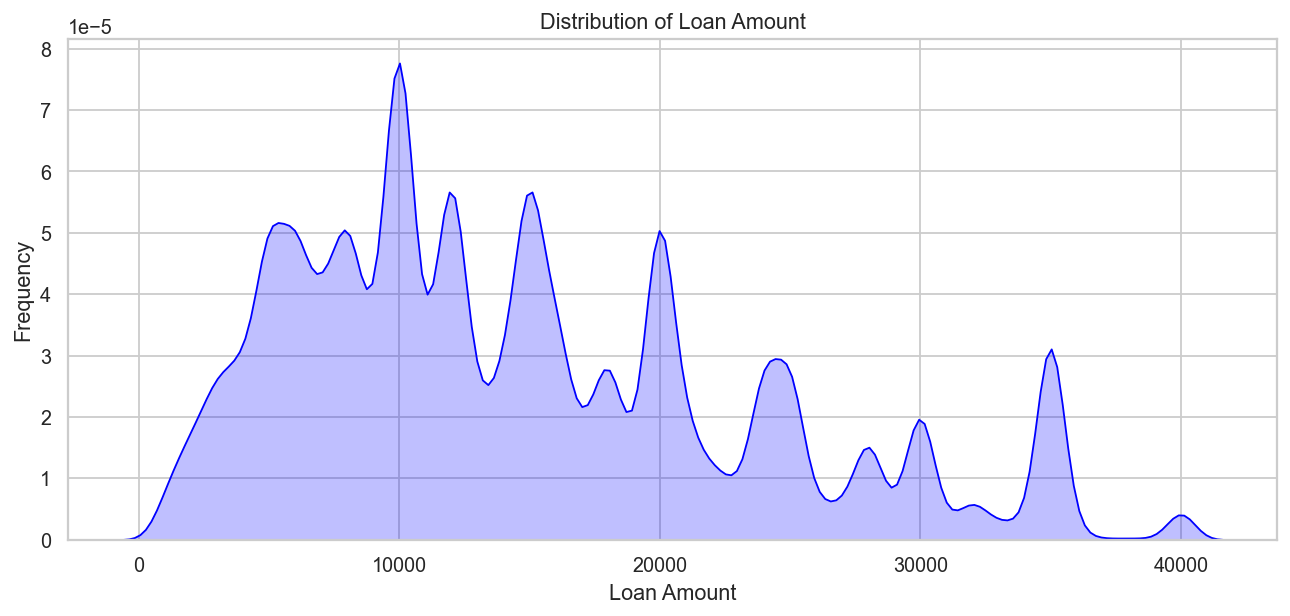

In [20]:
# Distribution of loan_amnt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.kdeplot(df['loan_amnt'],shade= True,color='blue')

# Add labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')

# Show the plot
plt.show()


In [21]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.0,15959.770622,8829.782328,1000.0,9600.0,15000.0,21000.0,40000.0
Fully Paid,979419.0,14405.418391,8721.564037,1000.0,8000.0,12000.0,20000.0,40000.0


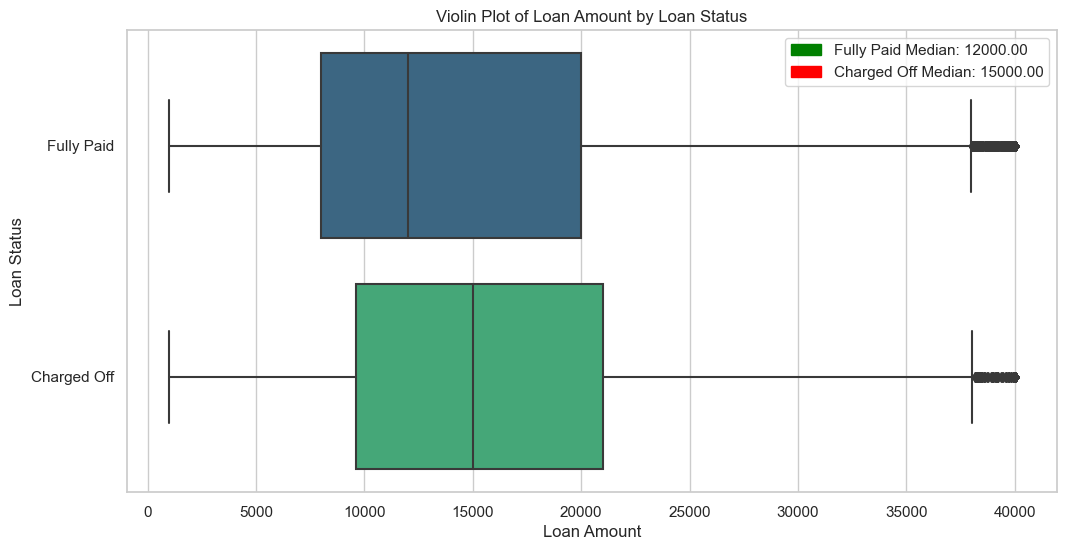

In [22]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='loan_amnt', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['loan_amnt'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['loan_amnt'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Violin Plot of Loan Amount by Loan Status')
plt.show()

We can observe that on an average the chances of charge off is higher if the loan_amount is higher

### 2. term

<Axes: xlabel='term (months)', ylabel='count'>

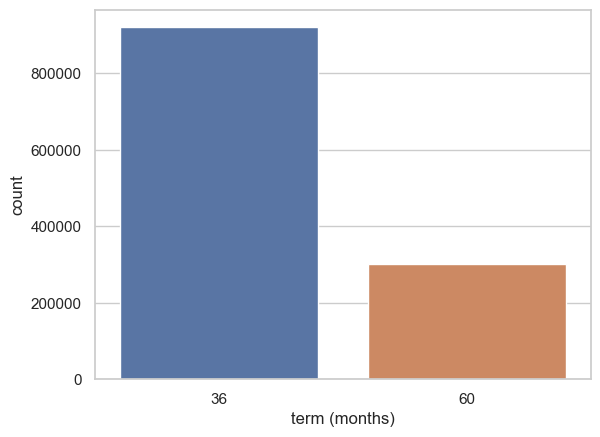

In [23]:
sns.countplot(data=df, x='term (months)')

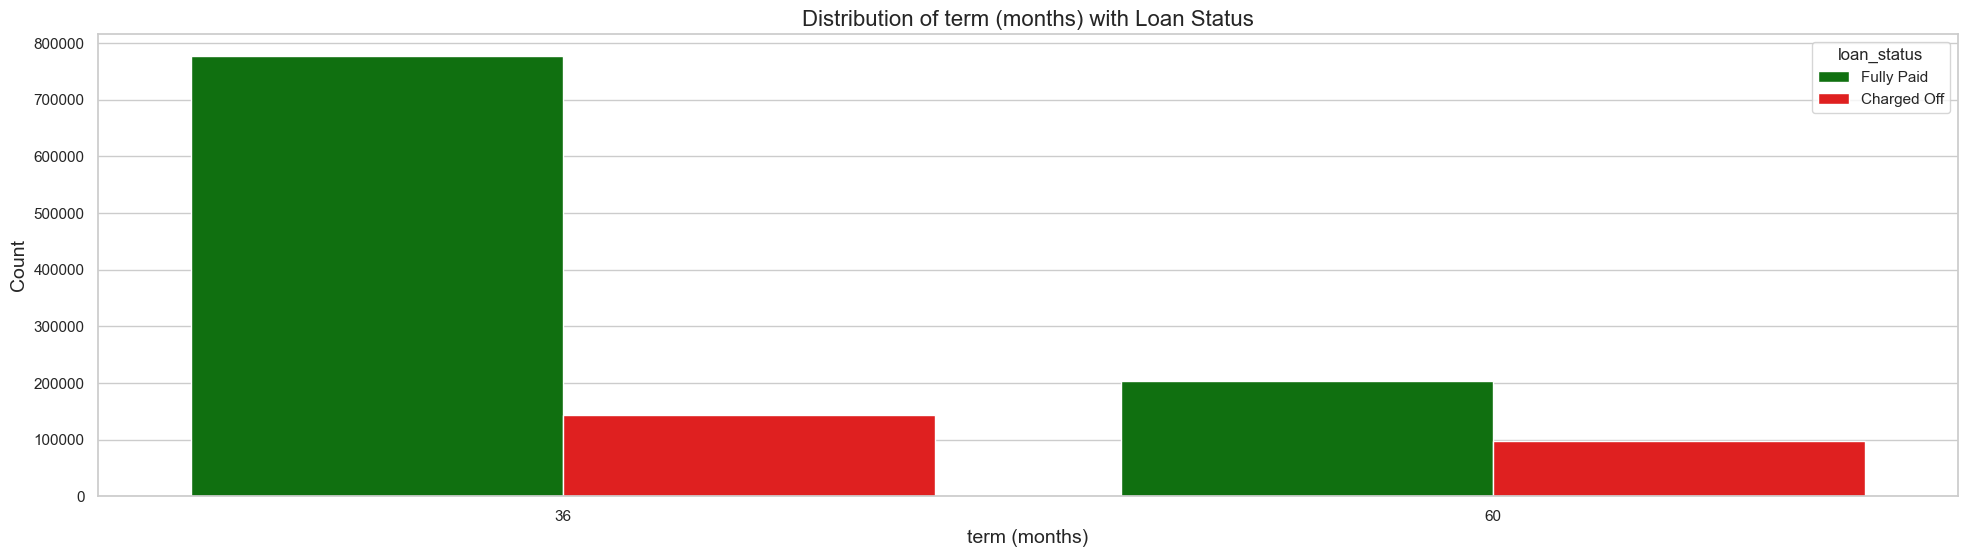

In [24]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 
term_order = sorted(df['term (months)'].unique())
sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

sns.countplot(x='term (months)', data=df, order=term_order, hue='loan_status', palette=color_palette)

plt.xlabel('term (months)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of term (months) with Loan Status', fontsize=16)

plt.show()

In [25]:
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("term (months)").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("term (months)").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'term (months)': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,term (months),Percentage Charged Off
0,36,15.586034
1,60,32.409486


In [26]:
term = pd.get_dummies(df['term (months)'], drop_first=True)
df = pd.concat([df.drop('term (months)', axis=1), term], axis=1)

### 4. int_rate 

In [27]:
df['int_rate'].describe()

count    1.220092e+06
mean     1.327424e+01
std      4.796682e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.602000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

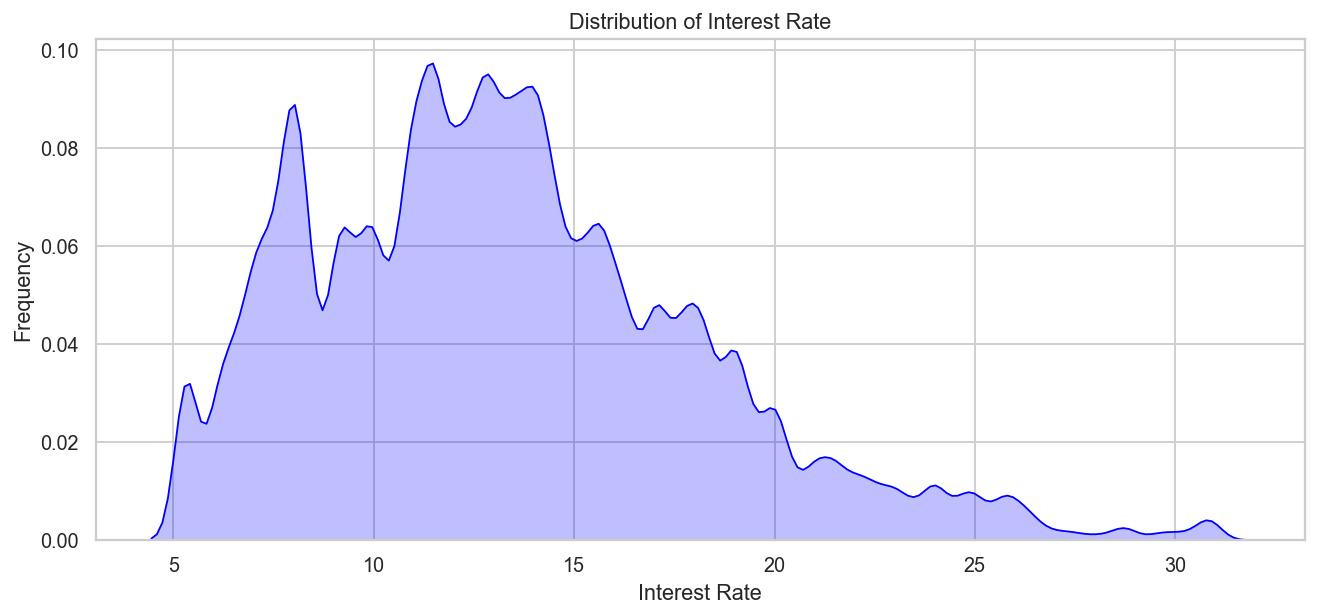

In [28]:
# Distribution of int_rate
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.kdeplot(df['int_rate'],shade= True,color='blue')

# Add labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rate')

# Show the plot
plt.show()


In [29]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,240673.0,15.800944,4.926199,5.31,12.39,15.10,18.75,30.99
Fully Paid,979419.0,12.653358,4.554606,5.31,9.17,12.29,15.31,30.99


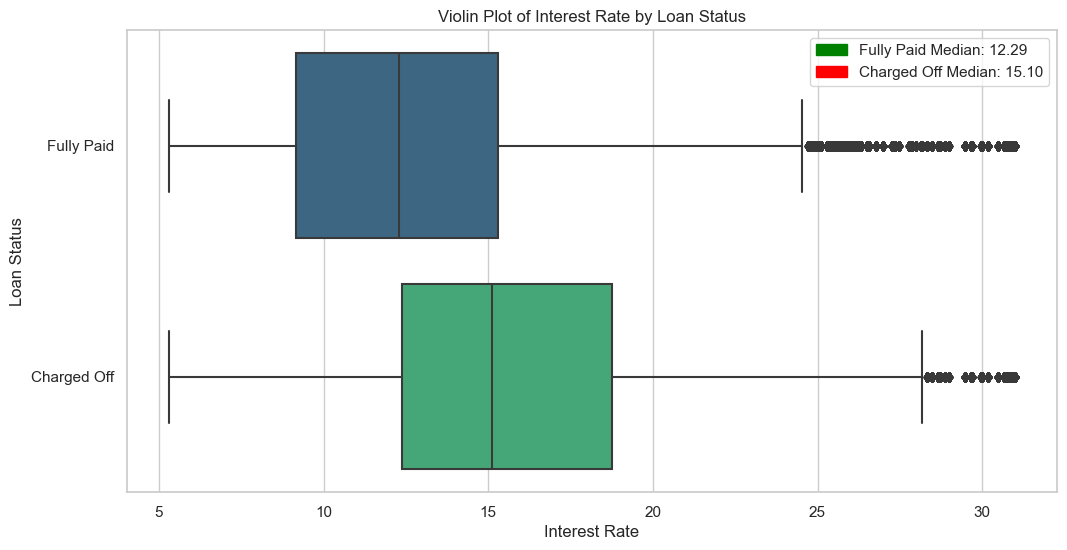

In [30]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='int_rate', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['int_rate'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['int_rate'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.title('Violin Plot of Interest Rate by Loan Status')
plt.show()

We can observe that the average interest rate is lower for fully paid loans compared to the chrged off ones

### 7. sub_grade

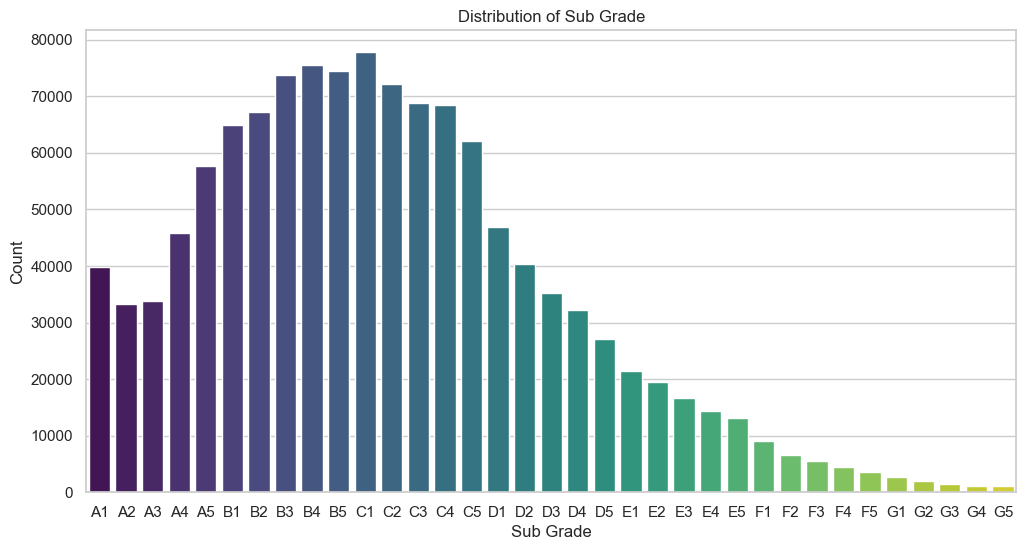

In [31]:
# Distibution of sub_grade

subgrade_order = sorted(df['sub_grade'].unique())

color_palette = sns.color_palette("viridis", len(subgrade_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette=color_palette)

plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.title('Distribution of Sub Grade')


plt.show()

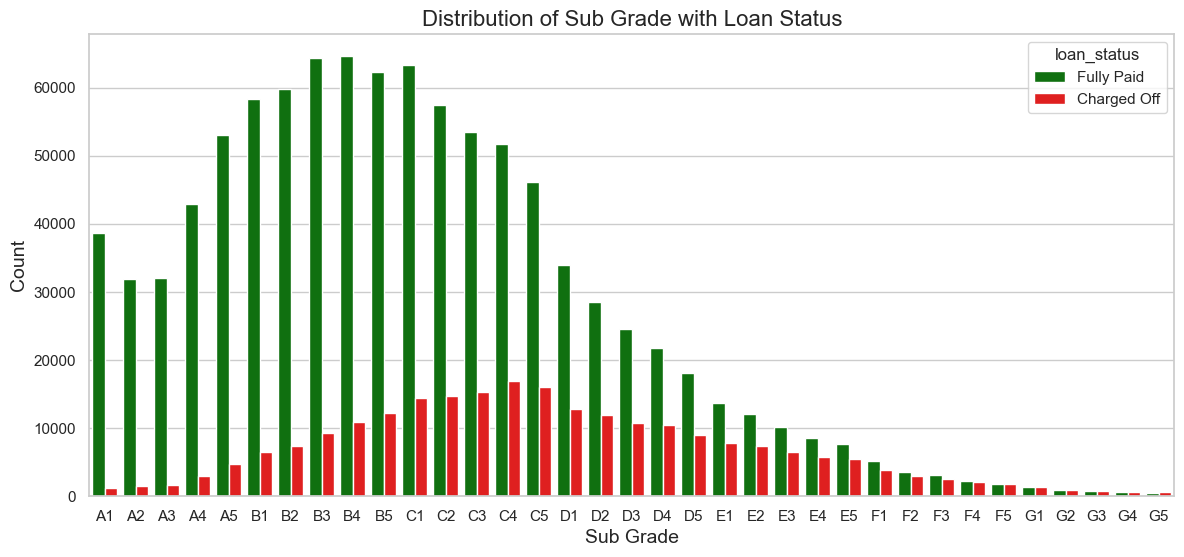

In [32]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='sub_grade', data=df, order=subgrade_order, hue='loan_status', palette=color_palette)

plt.xlabel('Sub Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Sub Grade with Loan Status', fontsize=16)

plt.show()

It appears that loans associated with F and G subgrades have a lower rate of repayment. Let's focus on these subgrades and create a countplot specifically for them to gain further insight.

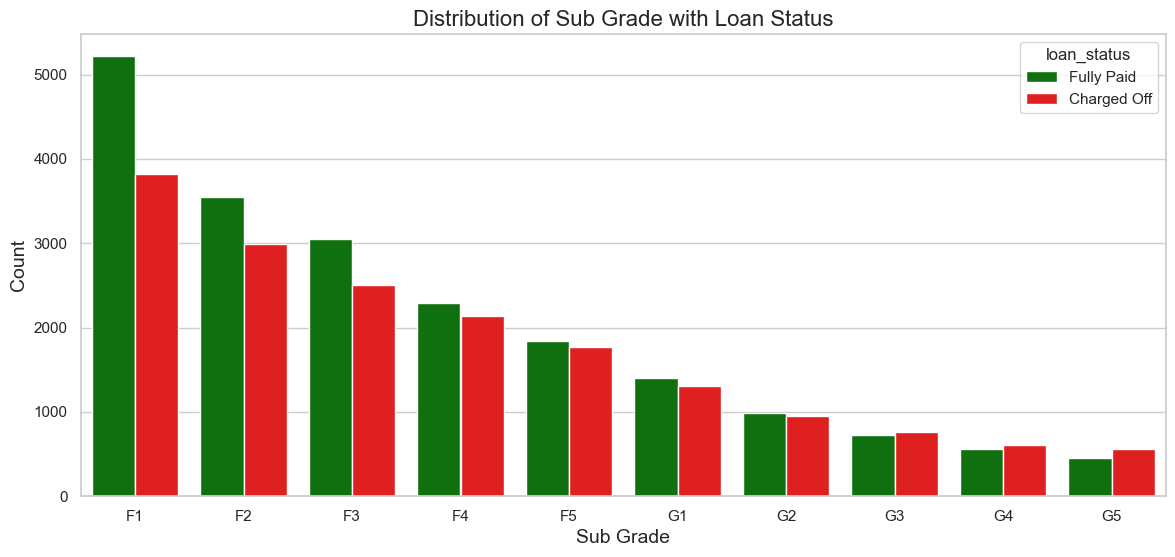

In [33]:
subgrade_order_f_g = sorted(df[df['sub_grade'].str.startswith(('F', 'G'))]['sub_grade'].unique())
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='sub_grade', data=df, order=subgrade_order_f_g, hue='loan_status', palette=color_palette)

plt.xlabel('Sub Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Sub Grade with Loan Status', fontsize=16)

plt.show()

Here we can clearly see that as subgrade progresses chance of getting paid back is lower. There is a pattern so we reatin this categorical variable

In [34]:
sub_grade = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), sub_grade], axis=1)

### 9. emp_length

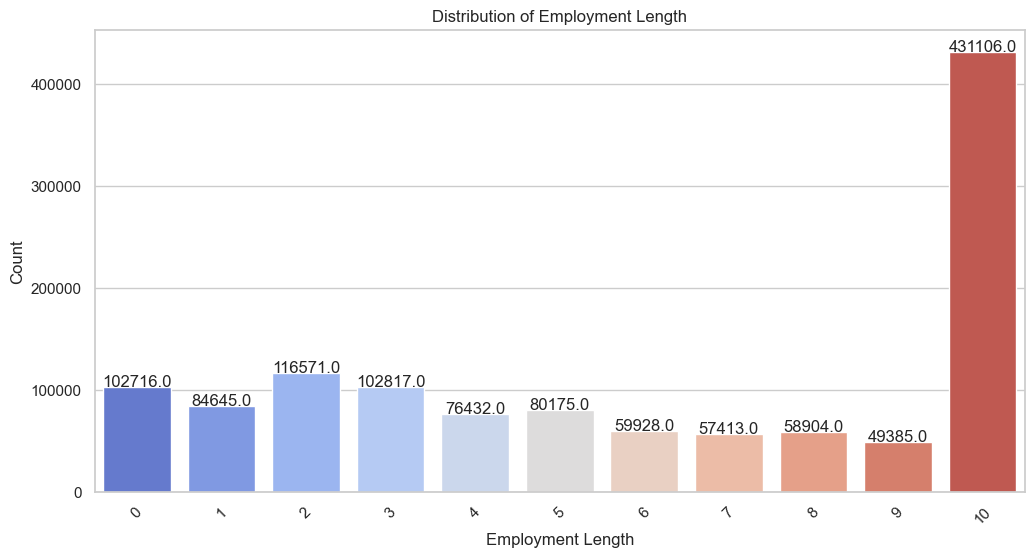

In [35]:
# Distibution of emp_length

emp_length_order = [i for i in range(0, 11)]

color_palette = sns.color_palette("coolwarm", len(emp_length_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='emp_length', data=df, order=emp_length_order, palette=color_palette)

plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')

# Rotating the x-axis labels 
plt.xticks(rotation=45)

# We need to annotate the bars with their counts
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 100), ha='center')

plt.show()

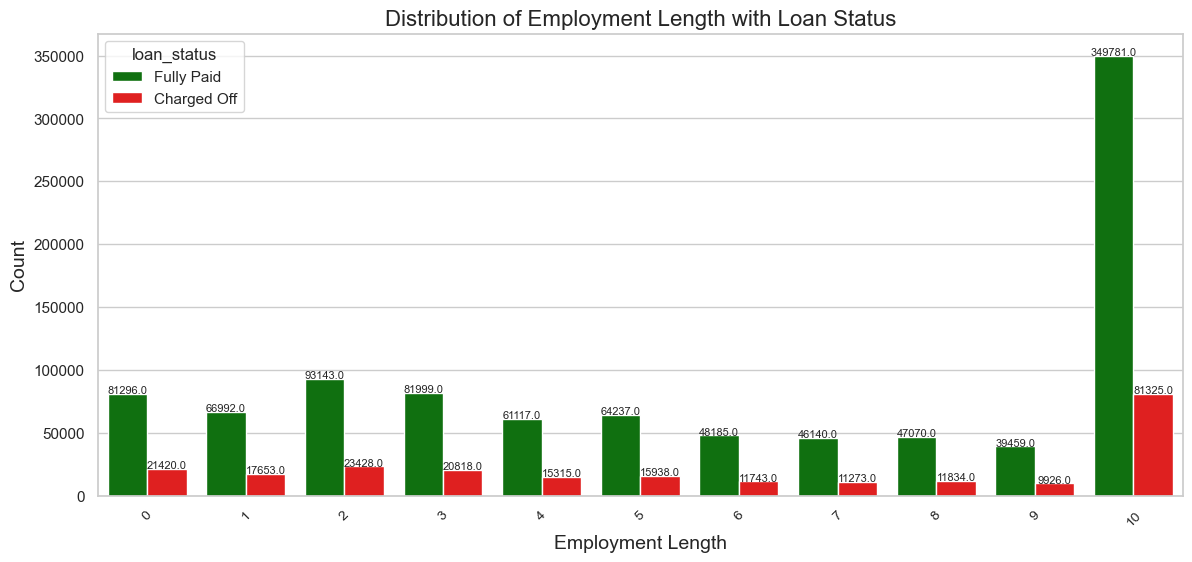

In [36]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status', palette=color_palette)

plt.xlabel('Employment Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Employment Length with Loan Status', fontsize=16)

plt.xticks(rotation=45, fontsize=10)  

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 100), ha='center', fontsize=8)

plt.show()

This does not show any pattern across different cateegories i.e the length of employment. So to get a better understanding lets see how % of people caharged of based on emp_length

In [37]:
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("emp_length").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("emp_length").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'Employment Length': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,Employment Length,Percentage Charged Off
0,0.0,20.853616
1,1.0,20.855337
2,2.0,20.097623
3,3.0,20.247624
4,4.0,20.037419
5,5.0,19.879015
6,6.0,19.595181
7,7.0,19.634926
8,8.0,20.090316
9,9.0,20.099220


Again from this we can see that there is no particular pattern which affects the loan status. Therefore we drop this off

In [38]:
df = df.drop('emp_length', axis=1)


### 10. home_ownership

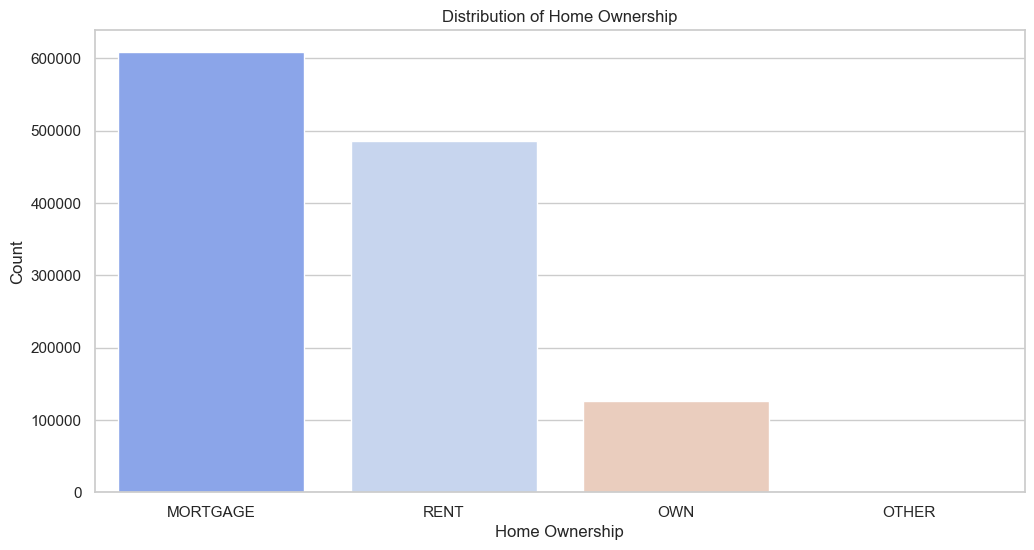

In [39]:
# Distibution of home_ownership

color_palette = sns.color_palette("coolwarm", len(df['home_ownership'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='home_ownership', data=df, palette=color_palette)

plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')


plt.show()

In [40]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    608597
RENT        485441
OWN         125703
OTHER          351
Name: count, dtype: int64

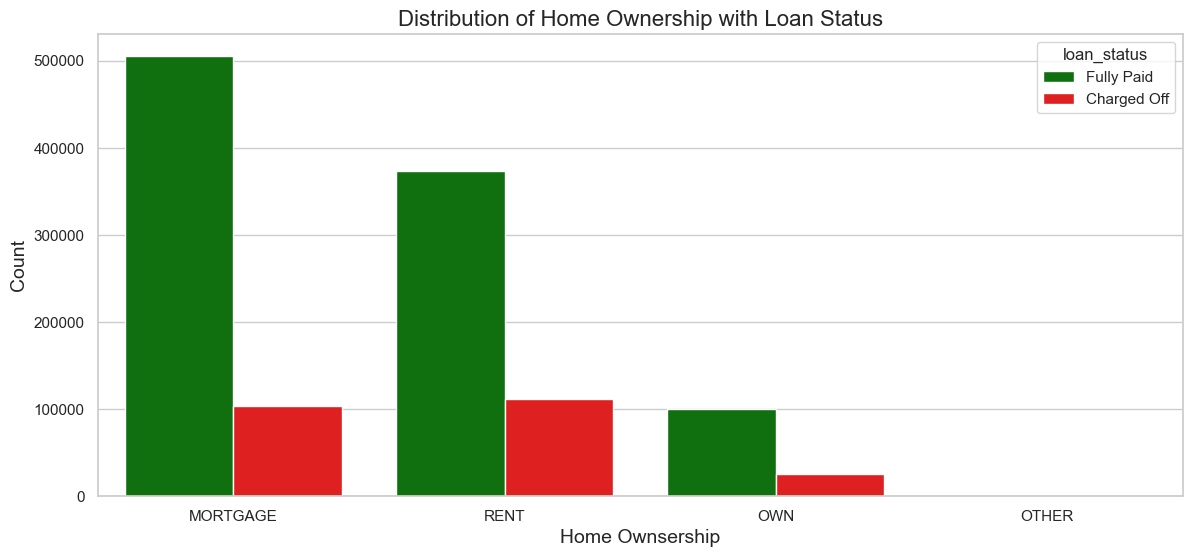

In [41]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='home_ownership', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('Home Ownsership', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Home Ownership with Loan Status', fontsize=16)

plt.show()

In [42]:
# percentage charged off 
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("home_ownership").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("home_ownership").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'Hoem Ownership': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,Hoem Ownership,Percentage Charged Off
0,MORTGAGE,17.000248
1,OTHER,18.803419
2,OWN,20.028957
3,RENT,23.065007


We can clearly see that the chances of charge off is distinctive for each category and moreover charge off is less likely for applicants with own homes. Therefore we reatin thsi categorical variable and also as ther are only 4 categopries we perform ohe

In [43]:
home_ownership = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1), home_ownership], axis=1)


### 11. annual_inc

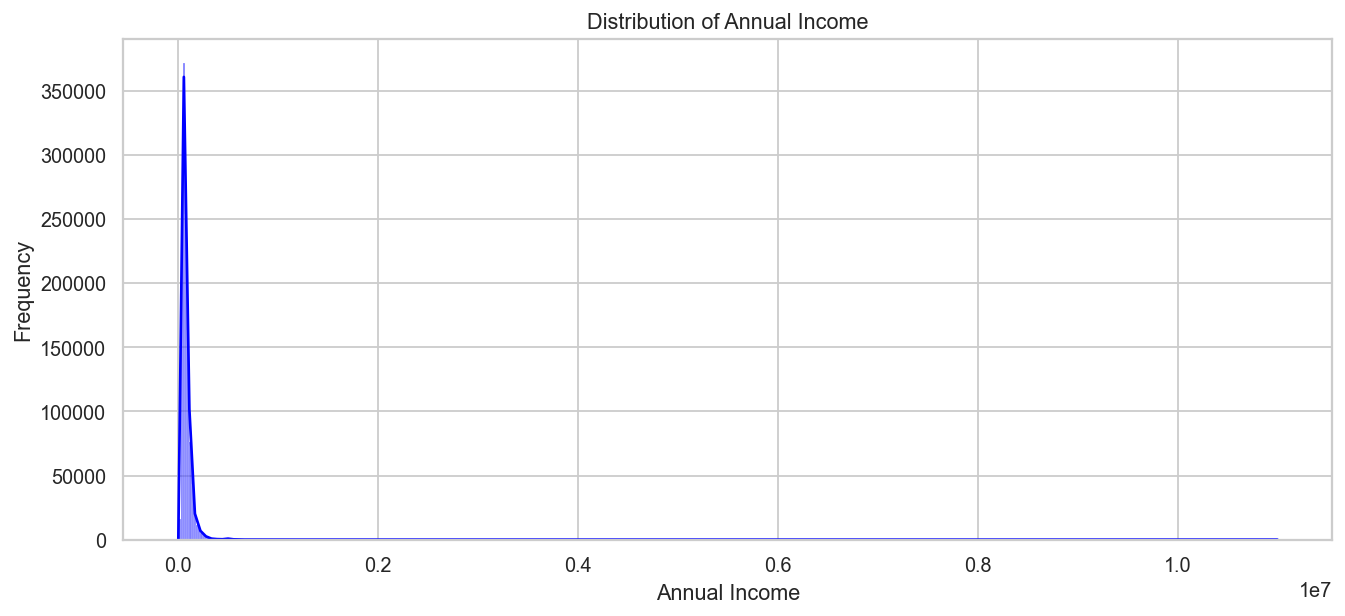

In [44]:
# Distribution of annual_inc
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df['annual_inc'],bins =500, kde= True,color='blue')

# Add labels and title
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')

# Show the plot
plt.show()


The salary distribution is highly skewed towards right. Let's find how many customers have annual_inc higher than $250k

In [45]:
pd.options.display.float_format = '{:.2f}'.format
description = df['annual_inc'].describe()
print(description)

count    1220092.00
mean       78196.50
std        71337.65
min           33.00
25%        48000.00
50%        65000.00
75%        93000.00
max     10999200.00
Name: annual_inc, dtype: float64


In [46]:
num_above_250k = df[df['annual_inc'] > 250000].shape[0]

# Total number of people
total_people = df.shape[0]

# Calculate the percentage
percentage_above_250k = (num_above_250k / total_people) * 100

print("Percentage of people with annual income greater than 250k: {:.2f}%".format(percentage_above_250k))

Percentage of people with annual income greater than 250k: 1.06%


Onbly 1% of the population have income greater than 250k - so we can drop these outliers

In [47]:
df = df[df['annual_inc'] <= 250000]

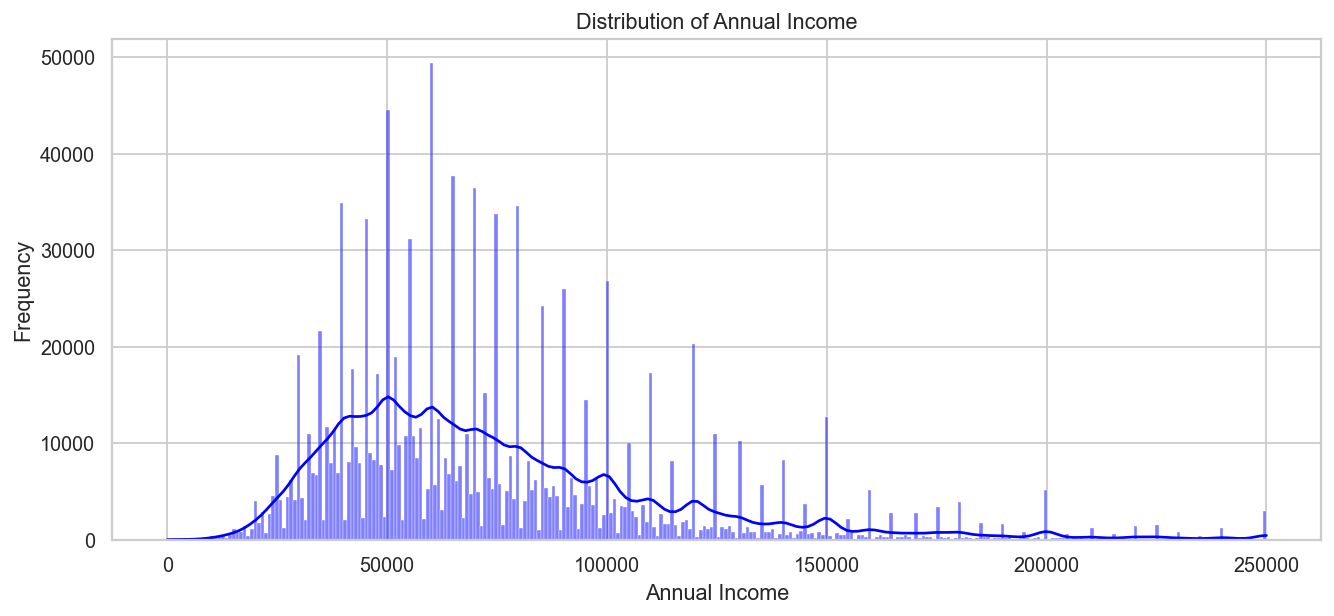

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df['annual_inc'], kde= True,color='blue')

# Add labels and title
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')

# Show the plot
plt.show()


Look much better less skewed

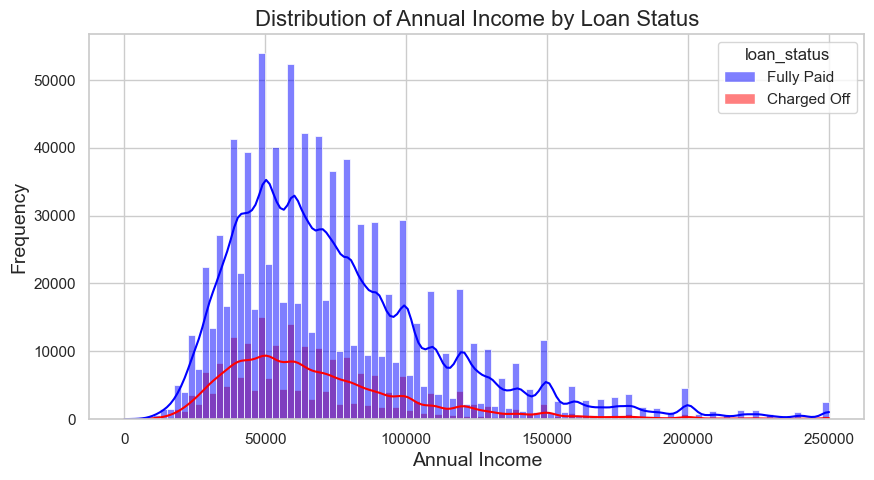

In [49]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='annual_inc', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('Annual Income', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of Annual Income by Loan Status', fontsize=16, )

# Show plot
plt.show()


In [50]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,238993.00,70190.98,36200.97,100.00,45000.00,61800.00,85000.00,250000.00
Fully Paid,968155.00,75655.24,39100.68,33.00,48000.00,67000.00,94000.00,250000.00


The mean annual_inc for customers who fully paid the loan and who did not differs by around $5500.

### 12. verification_status

In [51]:
#verification_status

df['verification_status'].value_counts()

verification_status
Source Verified    486188
Not Verified       370247
Verified           350713
Name: count, dtype: int64

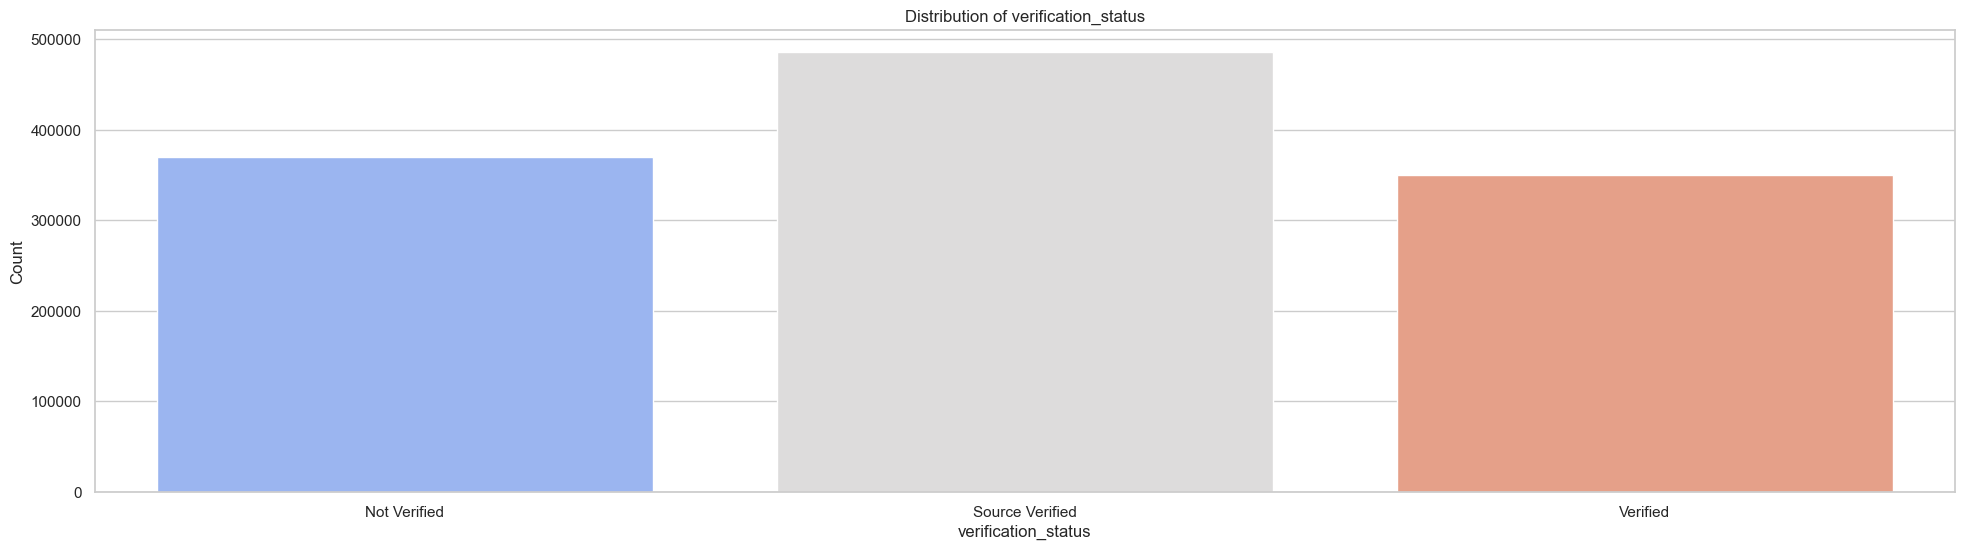

In [52]:
# Distibution of home_ownership

color_palette = sns.color_palette("coolwarm", len(df['verification_status'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

sns.countplot(x='verification_status', data=df, palette=color_palette)

plt.xlabel('verification_status')
plt.ylabel('Count')
plt.title('Distribution of verification_status')

plt.show()

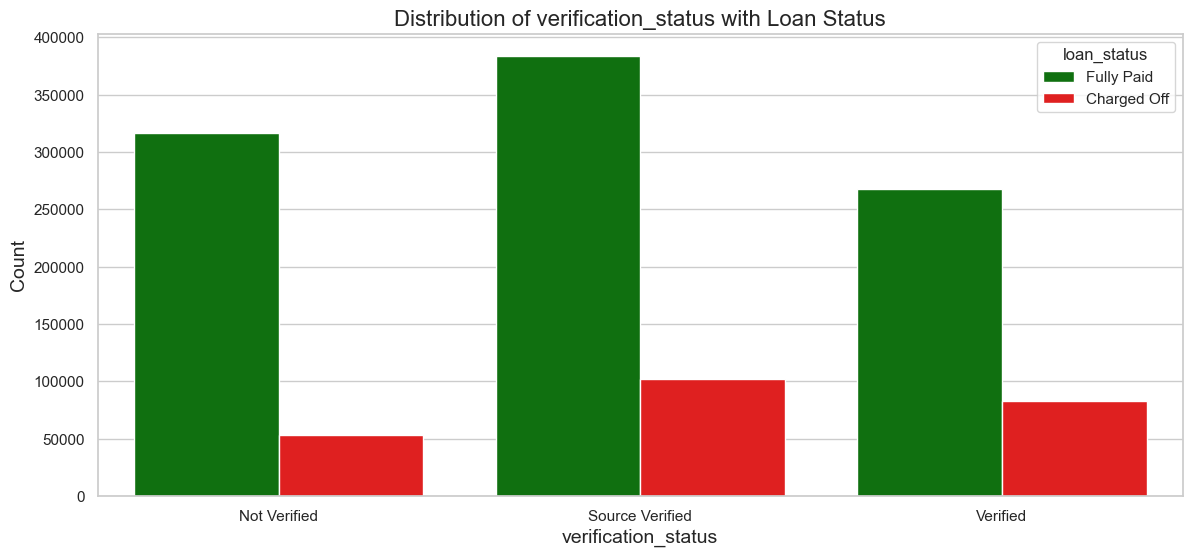

In [53]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='verification_status', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('verification_status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of verification_status with Loan Status', fontsize=16)

plt.show()

In [54]:
# percentage charged off 
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("verification_status").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("verification_status").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'verification_status': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,verification_status,Percentage Charged Off
0,Not Verified,14.47
1,Source Verified,21.07
2,Verified,23.67


In [55]:
verification_status = pd.get_dummies(df['verification_status'], drop_first=True)
df = pd.concat([df.drop('verification_status', axis=1), verification_status], axis=1)

### 15. purpose

In [56]:
len(df['purpose'].unique())

14

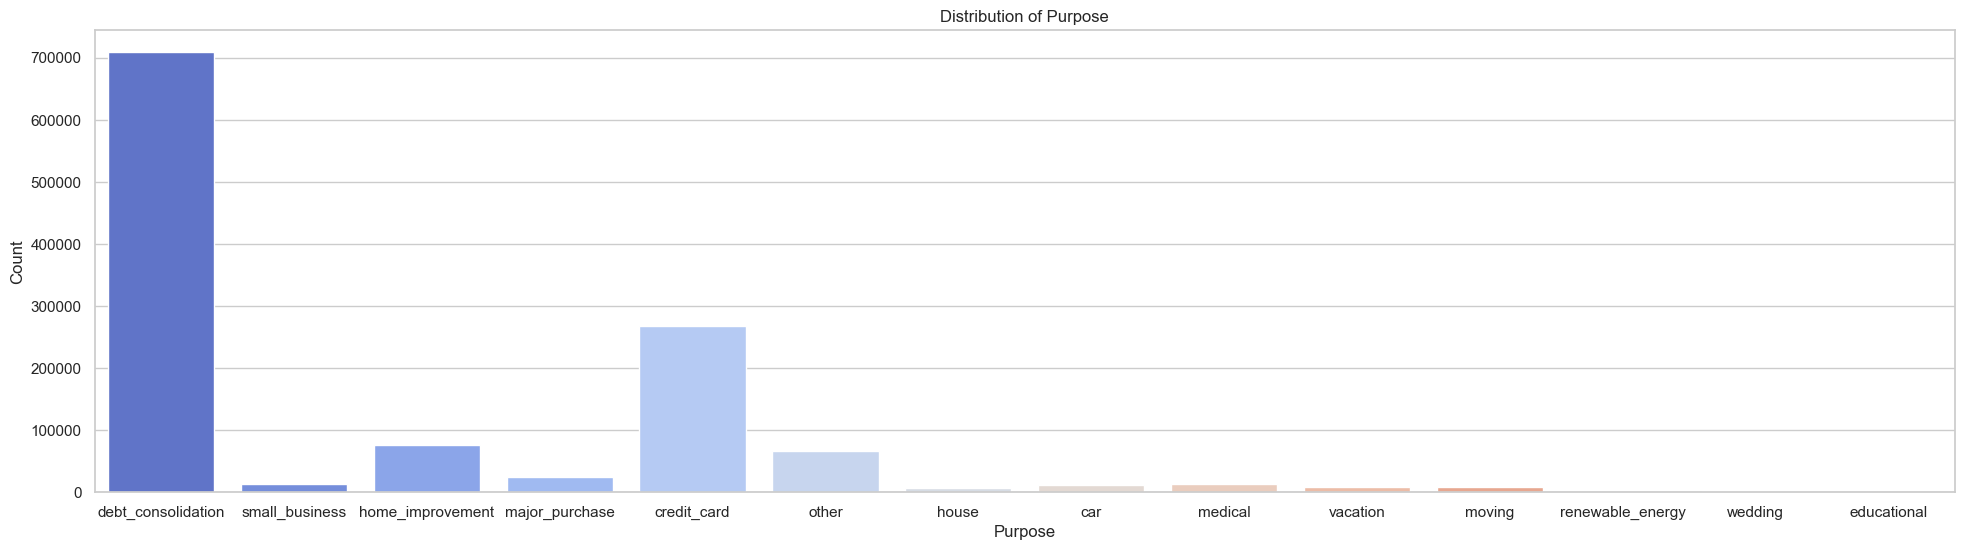

In [57]:
# Distibution of home_ownership

color_palette = sns.color_palette("coolwarm", len(df['purpose'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

sns.countplot(x='purpose', data=df, palette=color_palette)

plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Distribution of Purpose')

plt.show()

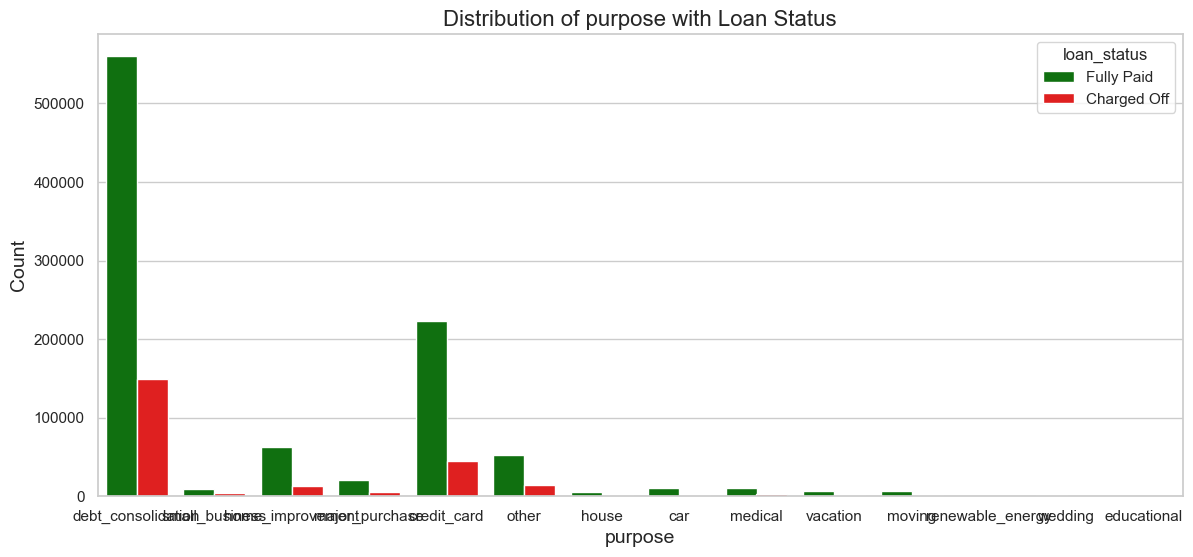

In [58]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='purpose', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of purpose with Loan Status', fontsize=16)

plt.show()

In [59]:
# percentage charged off 
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("purpose").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("purpose").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'purpose': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,purpose,Percentage Charged Off
0,car,14.72
1,credit_card,16.63
2,debt_consolidation,20.96
3,educational,NaN
4,home_improvement,17.65
5,house,22.25
6,major_purchase,19.12
7,medical,21.18
8,moving,23.45
9,other,21.02


In [60]:
purpose = pd.get_dummies(df['purpose'], drop_first=True)
df = pd.concat([df.drop('purpose', axis=1), purpose], axis=1)

### 21. and 22. fico_range_low and fico_range_high

From the above correlation matrix we can see that these 2 features are highly correlated. So we explore their distribution

In [61]:
df['fico_range_high'].describe()

count   1207148.00
mean        699.31
std          31.24
min         664.00
25%         674.00
50%         694.00
75%         714.00
max         850.00
Name: fico_range_high, dtype: float64

In [62]:
df['fico_range_low'].describe()

count   1207148.00
mean        695.31
std          31.24
min         660.00
25%         670.00
50%         690.00
75%         710.00
max         845.00
Name: fico_range_low, dtype: float64

Both fico_range_high and fico_range_low exhibit comparable statistics. Therefore, we will utilize the average of both scores. and drop the individual scores

In [63]:
df['fico_avg'] = (df['fico_range_high'] + df['fico_range_low']) / 2


In [64]:
df = df.drop(['fico_range_high', 'fico_range_low'], axis=1)

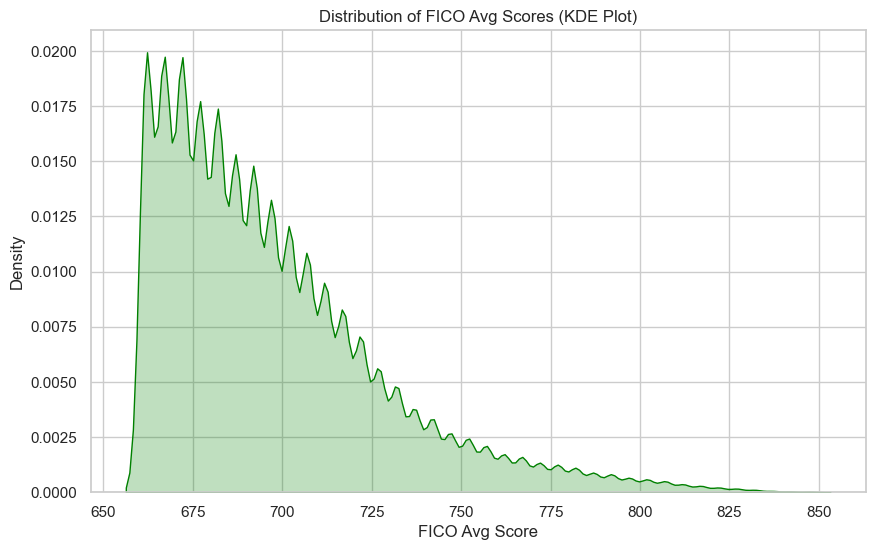

In [65]:
import matplotlib.pyplot as plt

# Plot KDE plot of FICO scores
plt.figure(figsize=(10, 6))
sns.kdeplot(df['fico_avg'], shade=True, color='green')
plt.xlabel('FICO Avg Score')
plt.ylabel('Density')
plt.title('Distribution of FICO Avg Scores (KDE Plot)')
plt.grid(True)
plt.show()


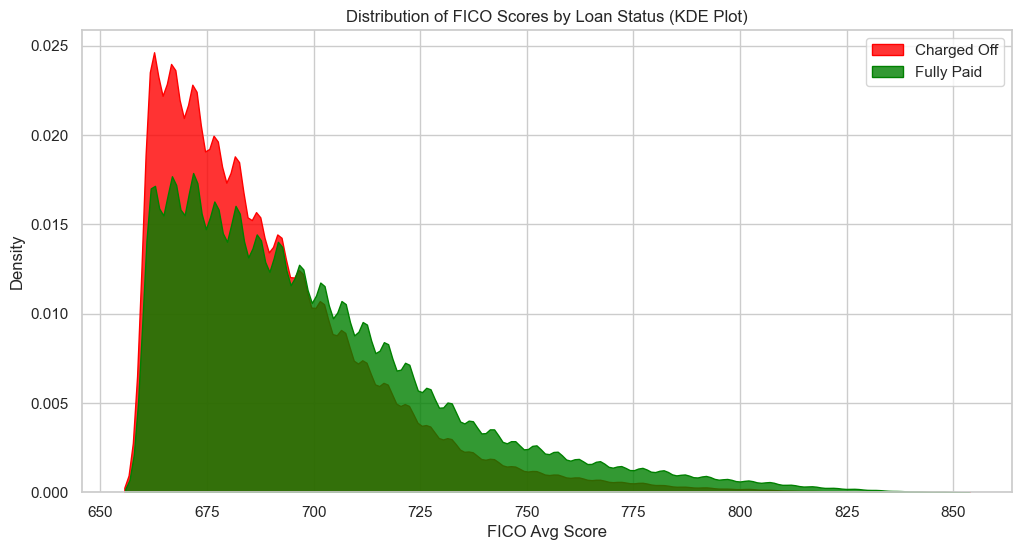

In [66]:
import seaborn as sns

# Plot KDE plots of FICO scores for fully paid and charged off loans
plt.figure(figsize=(12, 6))

sns.kdeplot(df[df['loan_status'] == 'Charged Off']['fico_avg'], shade=True, color='red', label='Charged Off', alpha=0.8)
sns.kdeplot(df[df['loan_status'] == 'Fully Paid']['fico_avg'], shade=True, color='green', label='Fully Paid', alpha=0.8)

plt.xlabel('FICO Avg Score')
plt.ylabel('Density')
plt.title('Distribution of FICO Scores by Loan Status (KDE Plot)')
plt.legend()
plt.grid(True)
plt.show()


In [67]:
df.groupby('loan_status')['fico_avg'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,238993.00,689.19,25.26,662.00,672.00,682.00,702.00,847.50
Fully Paid,968155.00,699.32,32.23,662.00,672.00,692.00,717.00,847.50


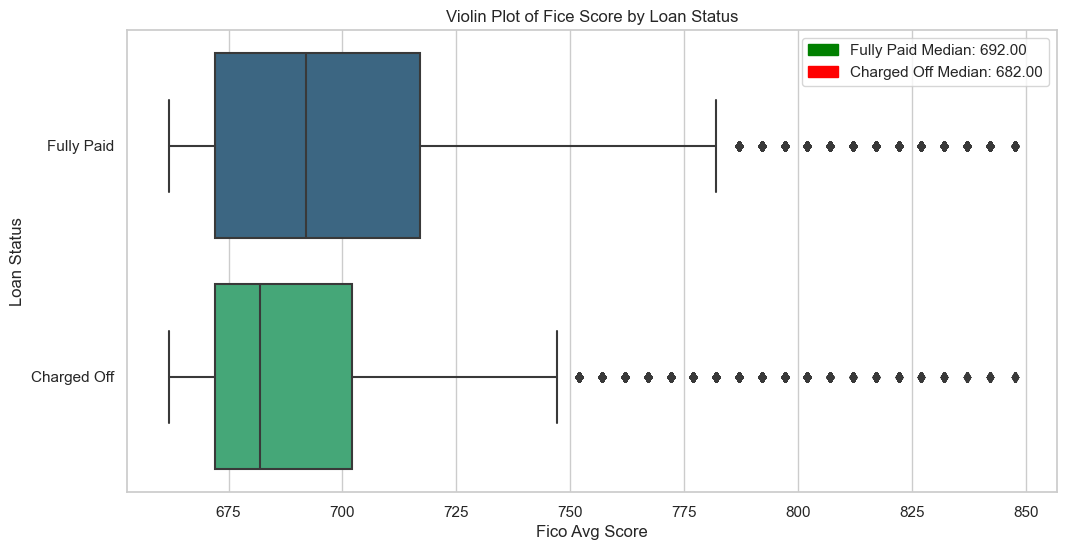

In [68]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='fico_avg', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['fico_avg'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['fico_avg'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Fico Avg Score')
plt.ylabel('Loan Status')
plt.title('Violin Plot of Fice Score by Loan Status')
plt.show()

People with higher credit score have better repayment of loan

### 23. open_acc

In [69]:

df['open_acc'].describe()

count   1207148.00
mean         11.74
std           5.49
min           1.00
25%           8.00
50%          11.00
75%          15.00
max          90.00
Name: open_acc, dtype: float64

<Axes: xlabel='open_acc', ylabel='count'>

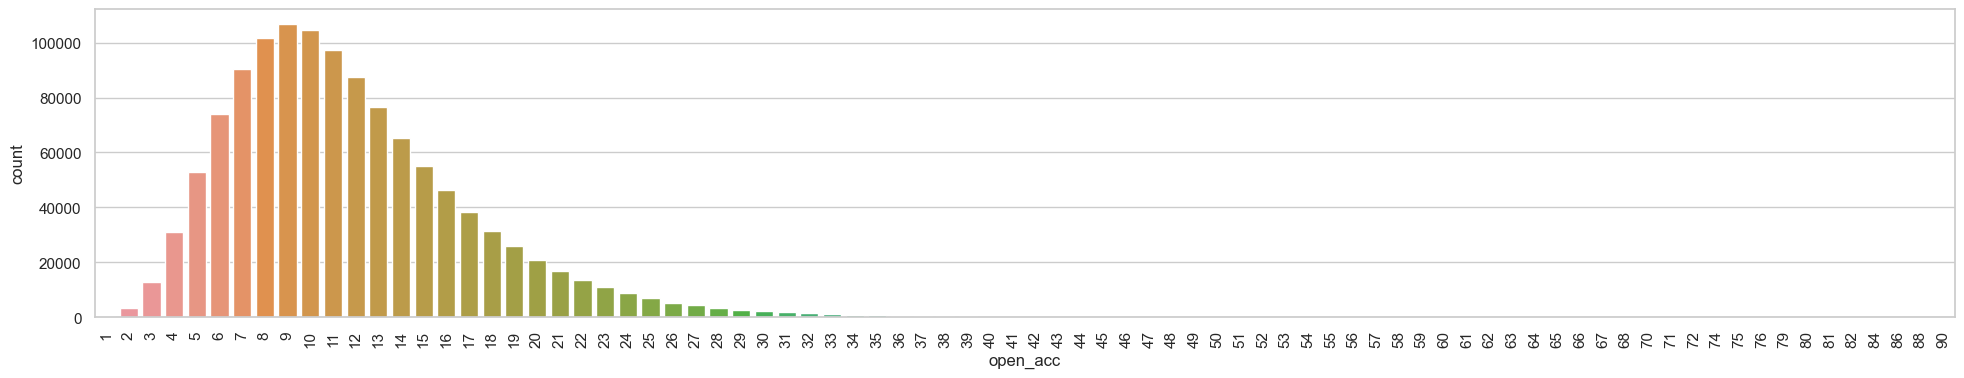

In [70]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='open_acc')

Distribution is highly skewed to the right, there fore we remove try to remove outliers to make it less skewed

In [71]:
# try from 26, 30 , 35
num_above_29 = df[df['open_acc'] > 29].shape[0]

# Total number of people
total_people = df.shape[0]

# Calculate the percentage
percentage_above_29 = (num_above_29 / total_people) * 100

print("Percentage of people with open_acc greater than 29: {:.2f}%".format(percentage_above_29))

Percentage of people with open_acc greater than 29: 0.95%


In [72]:
df = df[df['open_acc'] <= 29]

<Axes: xlabel='open_acc', ylabel='count'>

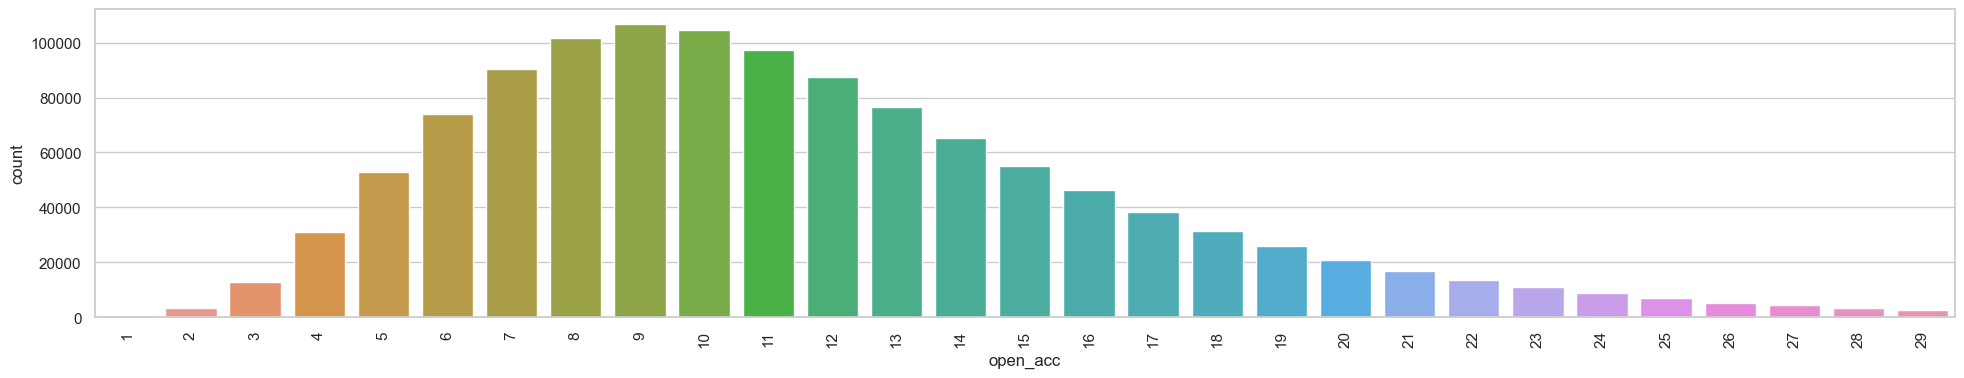

In [73]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='open_acc')

### 24. pub_rec

In [74]:
df['pub_rec'].describe()

count   1195652.00
mean          0.22
std           0.60
min           0.00
25%           0.00
50%           0.00
75%           0.00
max          86.00
Name: pub_rec, dtype: float64

<Axes: xlabel='pub_rec', ylabel='count'>

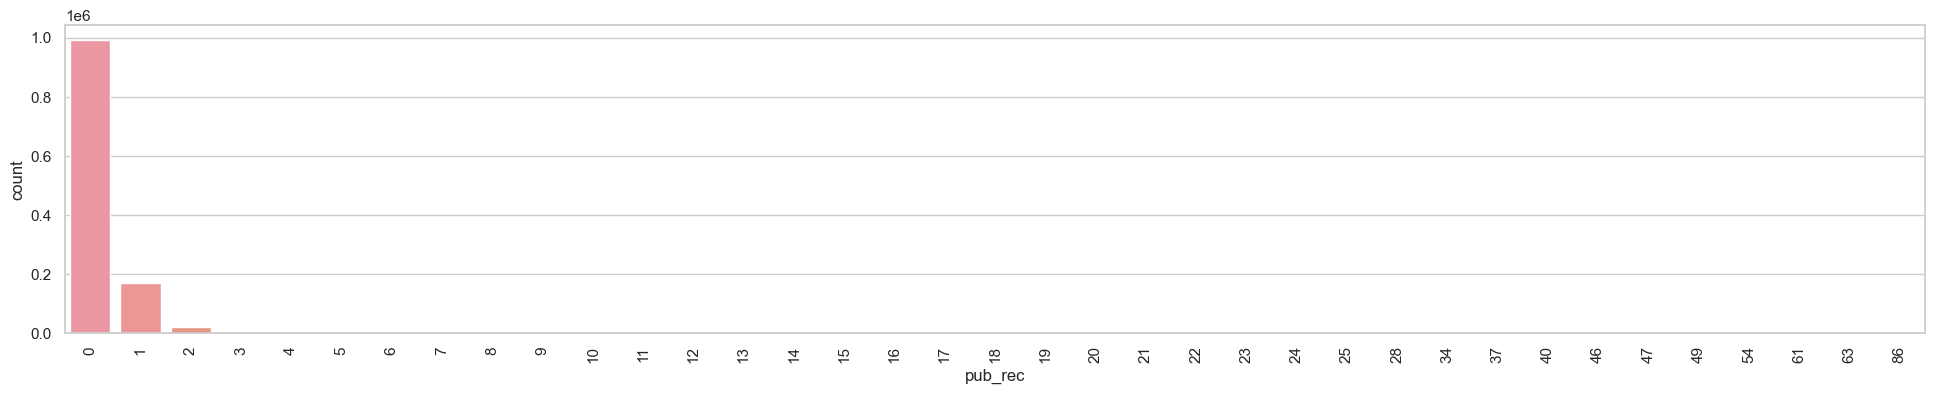

In [75]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='pub_rec')

In [76]:
# try from 2
num_above_2 = df[df['pub_rec'] > 2].shape[0]

# Total number of people
total_people = df.shape[0]

# Calculate the percentage
percentage_above_2 = (num_above_2 / total_people) * 100

print("Percentage of people with open_acc greater than 3: {:.2f}%".format(percentage_above_2))

Percentage of people with open_acc greater than 3: 0.95%


In [77]:
df = df[df['pub_rec'] <= 2]

<Axes: xlabel='pub_rec', ylabel='count'>

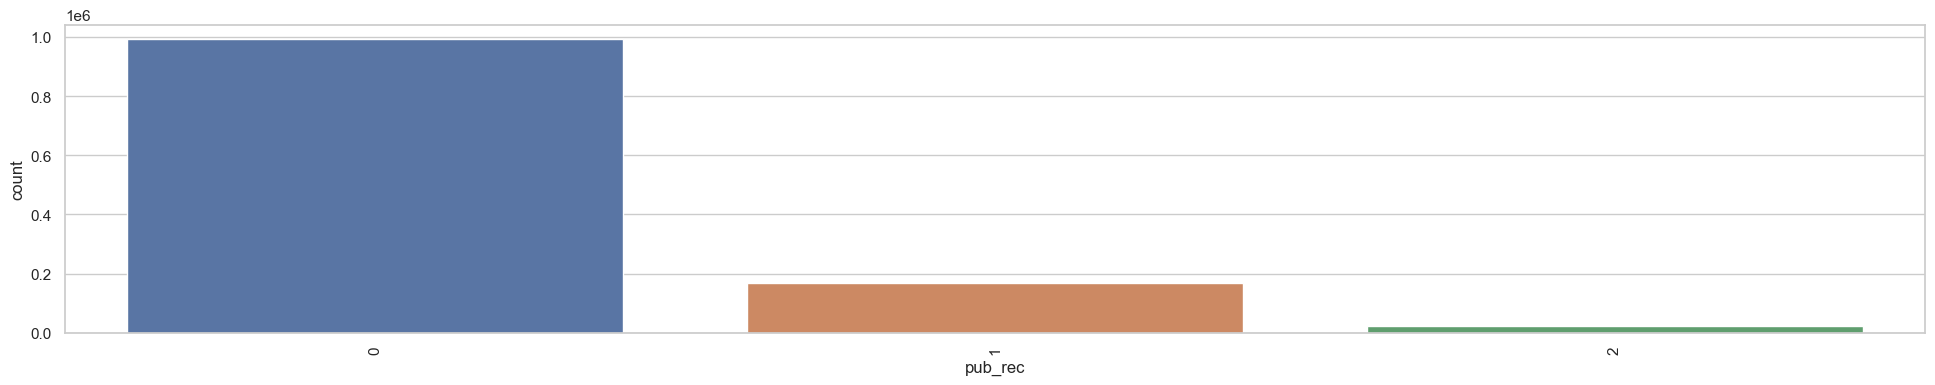

In [78]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='pub_rec')

In [79]:
df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,233626.00,0.20,0.45,0.00,0.00,0.00,0.00,2.00
Fully Paid,950699.00,0.17,0.42,0.00,0.00,0.00,0.00,2.00


There is slight difference in the average pub_rec for charged off and fully paid . We will retain thsi feature for now

### 25. revol_bal

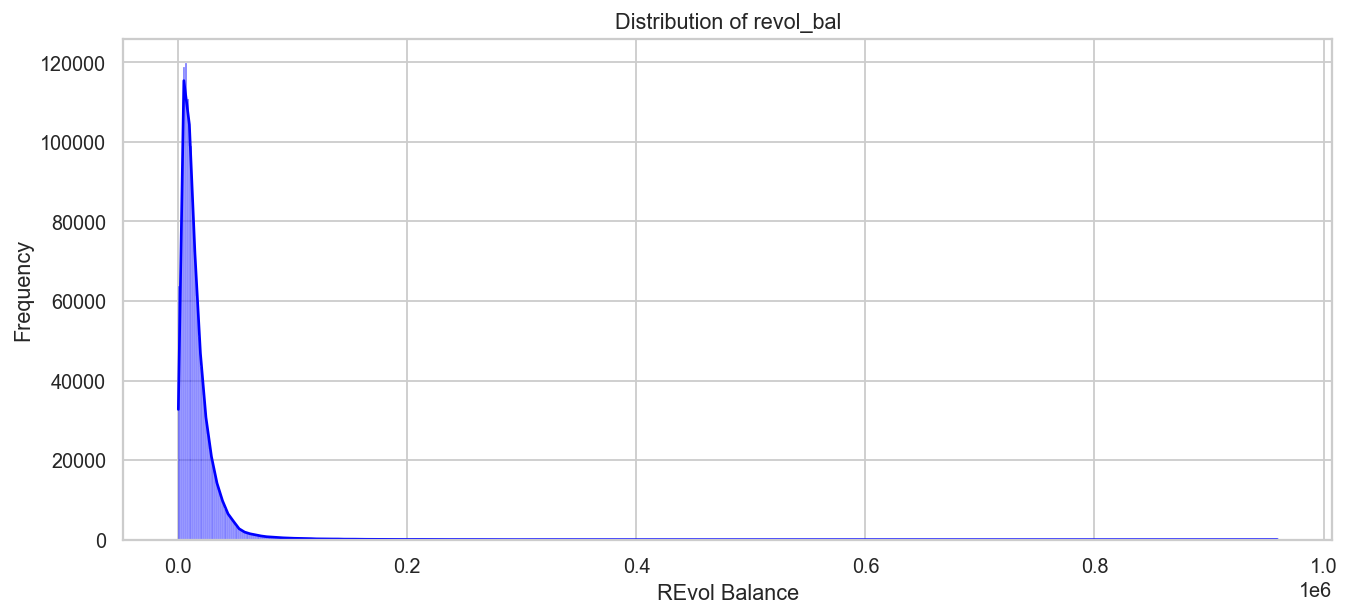

In [80]:
# Distribution of annual_inc
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df['revol_bal'],bins =500, kde= True,color='blue')

# Add labels and title
plt.xlabel('REvol Balance')
plt.ylabel('Frequency')
plt.title('Distribution of revol_bal')

# Show the plot
plt.show()


The revol_bal distribution is highly skewed towards right. 

In [81]:
pd.options.display.float_format = '{:.2f}'.format
description = df['revol_bal'].describe()
print(description)

count   1184325.00
mean      15970.82
std       19336.04
min           0.00
25%        6083.00
50%       11260.00
75%       19774.00
max      959754.00
Name: revol_bal, dtype: float64


In [82]:
num_above_100k = df[df['revol_bal'] > 100000].shape[0]

# Total number of people
total_people = df.shape[0]

# Calculate the percentage
percentage_above_100k = (num_above_100k / total_people) * 100

print("Percentage of people with revol_bal greater than 100k: {:.2f}%".format(percentage_above_100k))

Percentage of people with revol_bal greater than 100k: 0.75%


In [83]:
df = df[df['revol_bal'] <= 100000]

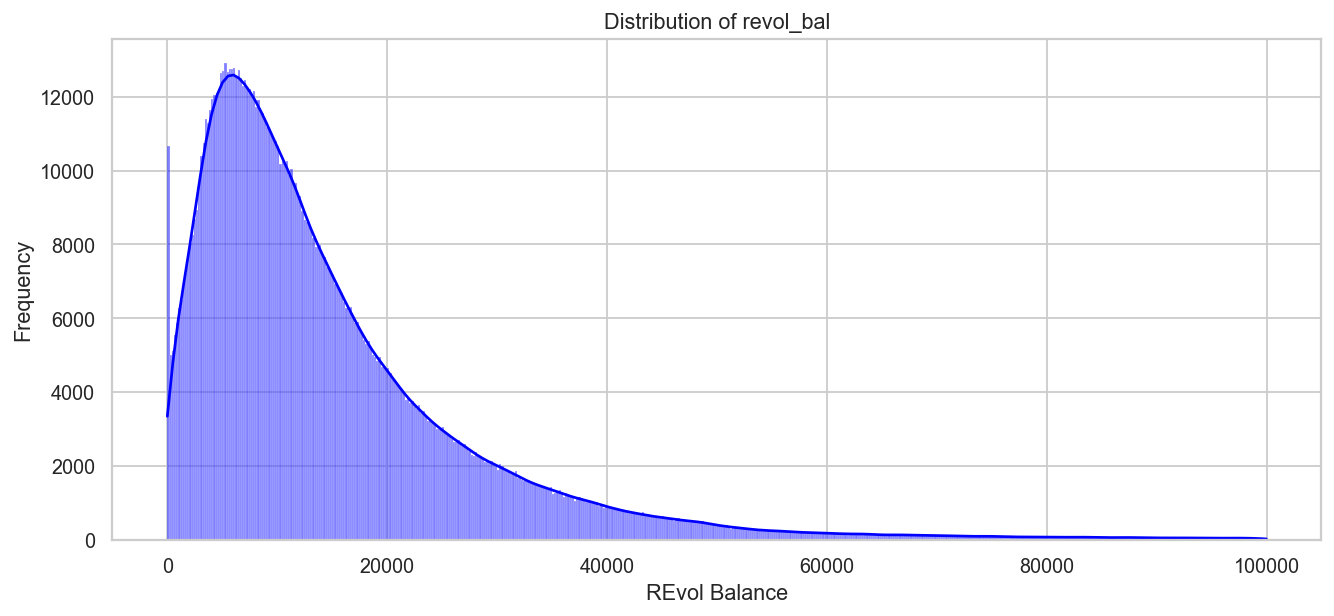

In [84]:
# Distribution of annual_inc
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df['revol_bal'],bins =500, kde= True,color='blue')

# Add labels and title
plt.xlabel('REvol Balance')
plt.ylabel('Frequency')
plt.title('Distribution of revol_bal')

# Show the plot
plt.show()


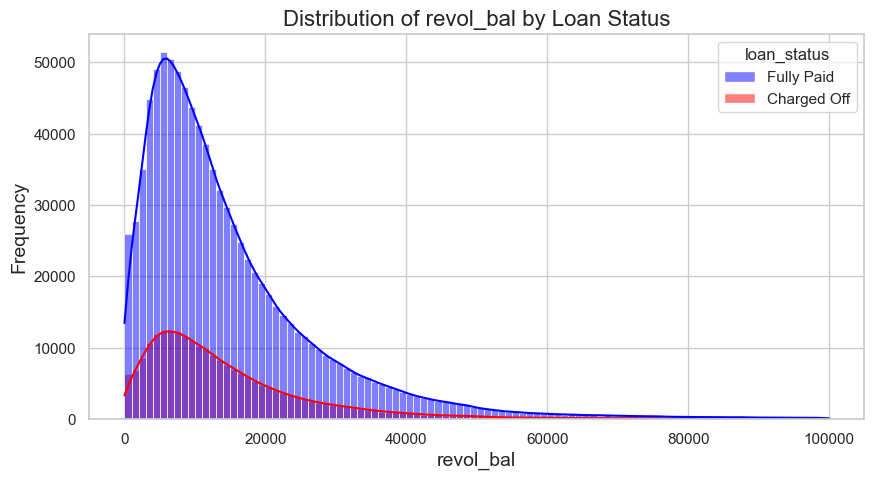

In [85]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='revol_bal', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('revol_bal', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of revol_bal by Loan Status', fontsize=16, )

# Show plot
plt.show()


lower the the balance higher the chance ofd charge off

### 26. revol_util

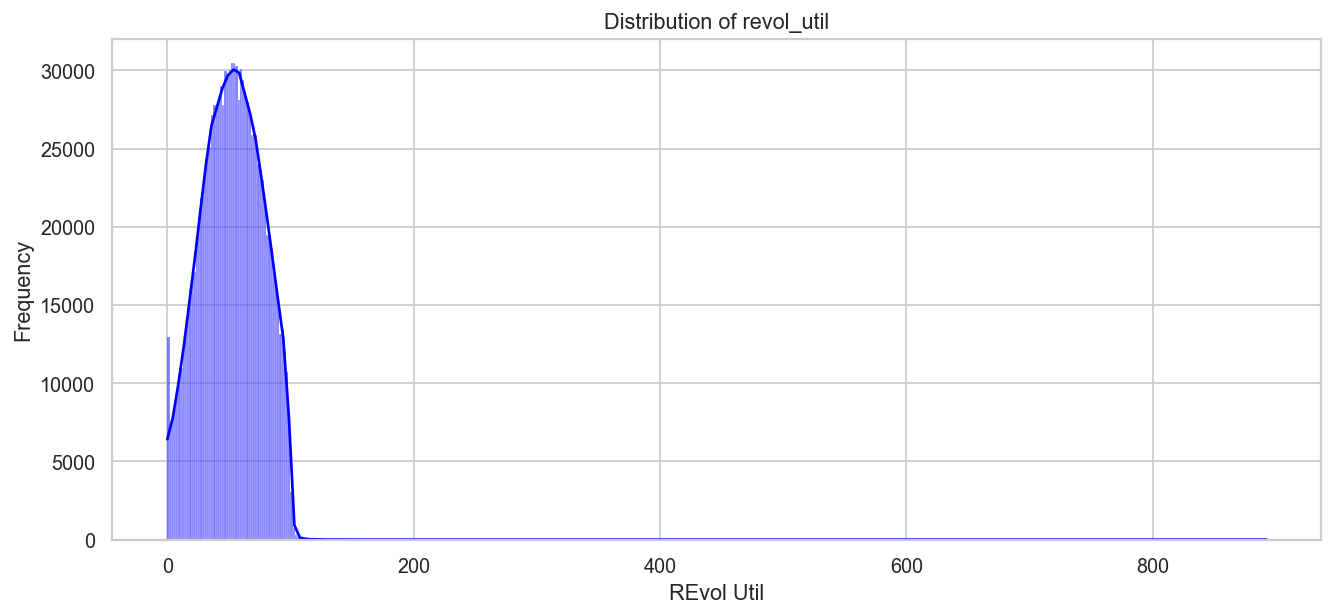

In [86]:
# Distribution of annual_inc
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df['revol_util'],bins =500, kde= True,color='blue')

# Add labels and title
plt.xlabel('REvol Util')
plt.ylabel('Frequency')
plt.title('Distribution of revol_util')

# Show the plot
plt.show()


The revol_bal distribution is highly skewed towards right. 

In [87]:
pd.options.display.float_format = '{:.2f}'.format
description = df['revol_util'].describe()
print(description)

count   1175414.00
mean         52.17
std          24.28
min           0.00
25%          34.10
50%          52.60
75%          70.90
max         892.30
Name: revol_util, dtype: float64


In [88]:
num_above_100k = df[df['revol_util'] > 100].shape[0]

# Total number of people
total_people = df.shape[0]

# Calculate the percentage
percentage_above_100k = (num_above_100k / total_people) * 100

print("Percentage of people with revol_bal greater than 100: {:.2f}%".format(percentage_above_100k))

Percentage of people with revol_bal greater than 100: 0.37%


In [89]:
df = df[df['revol_util'] <= 100]

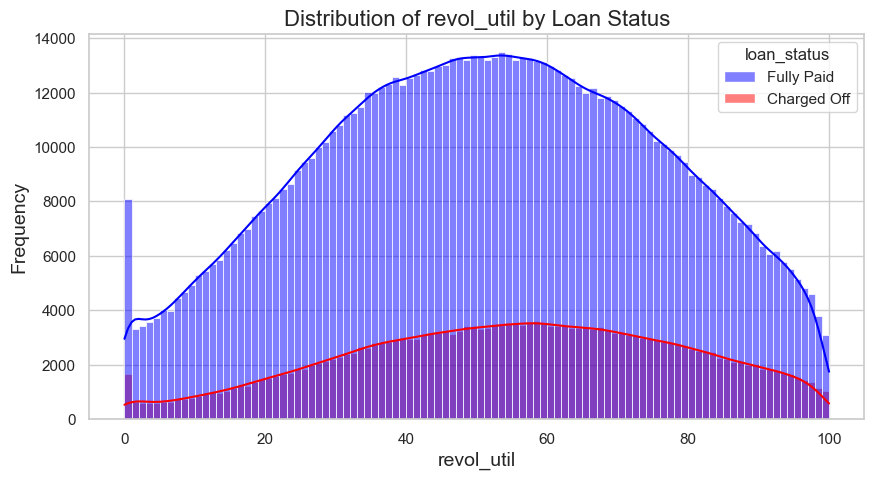

In [90]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='revol_util', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('revol_util', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of revol_util by Loan Status', fontsize=16, )

# Show plot
plt.show()


much better

### 27. total_acc

In [91]:

df['total_acc'].describe()

count   1171114.00
mean         24.80
std          11.56
min           2.00
25%          16.00
50%          23.00
75%          32.00
max         156.00
Name: total_acc, dtype: float64

<Axes: xlabel='total_acc', ylabel='count'>

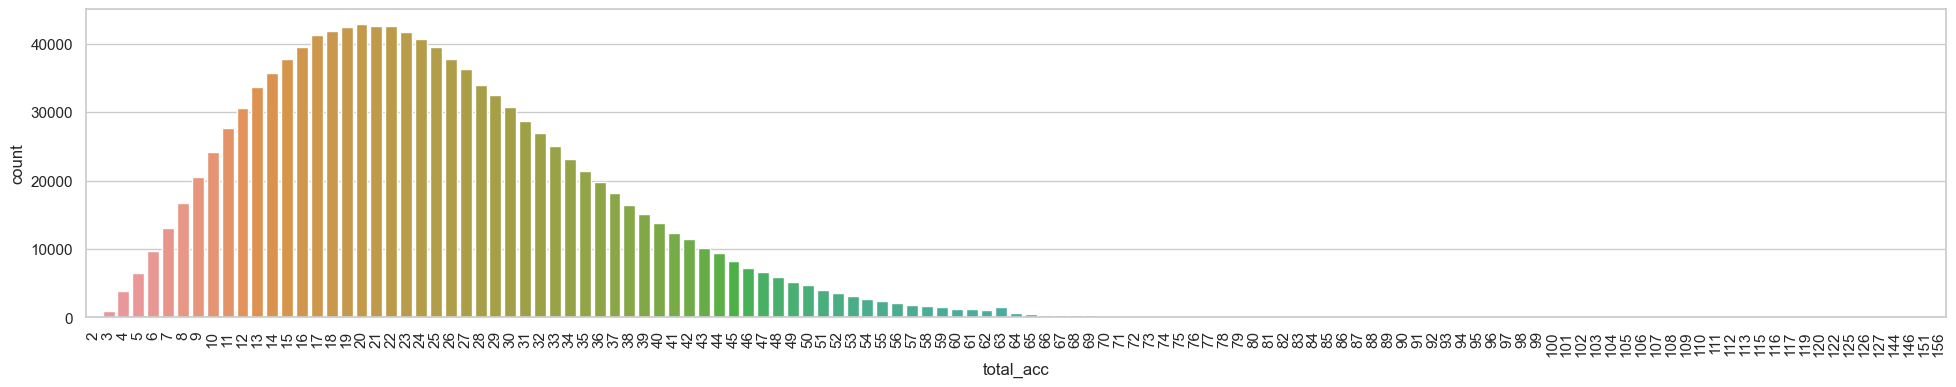

In [92]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc')

Distribution is highly skewed to the right, there fore we remove try to remove outliers to make it less skewed

In [93]:
# try from 63
num_above_60 = df[df['total_acc'] > 60].shape[0]

# Total number of people
total_people = df.shape[0]

# Calculate the percentage
percentage_above_60 = (num_above_60 / total_people) * 100

print("Percentage of people with mortgage accounts greater than 8: {:.2f}%".format(percentage_above_60))

Percentage of people with mortgage accounts greater than 8: 0.74%


Lets drop all records where the total_acc is > 60

In [94]:
df = df[df['total_acc'] <= 60]

<Axes: xlabel='total_acc', ylabel='count'>

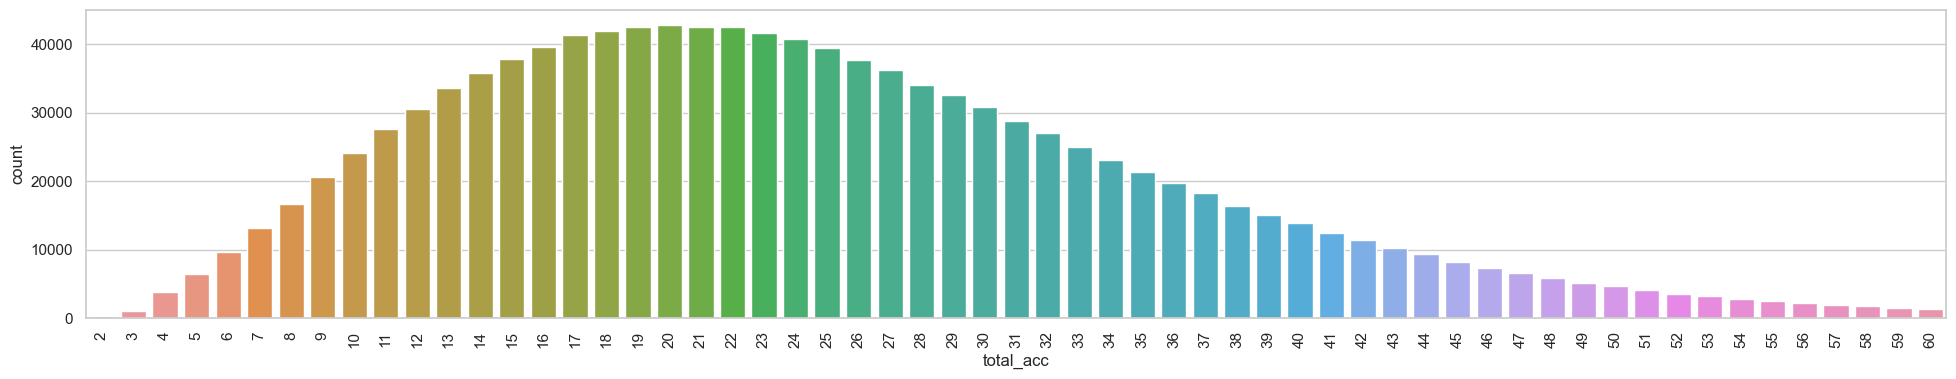

In [95]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='total_acc')

Much Better

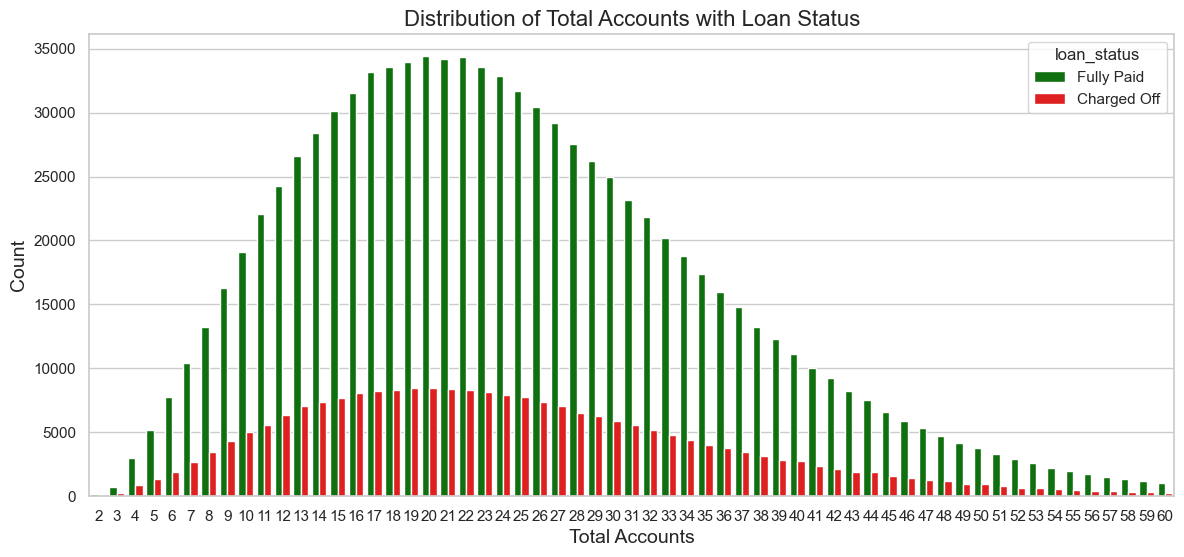

In [96]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='total_acc', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('Total Accounts', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Total Accounts with Loan Status', fontsize=16)

plt.show()

In [97]:
df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,229454.00,24.22,11.01,2.00,16.00,23.00,31.00,60.00
Fully Paid,932977.00,24.55,10.98,2.00,16.00,23.00,31.00,60.00


### 28. initial_list_status

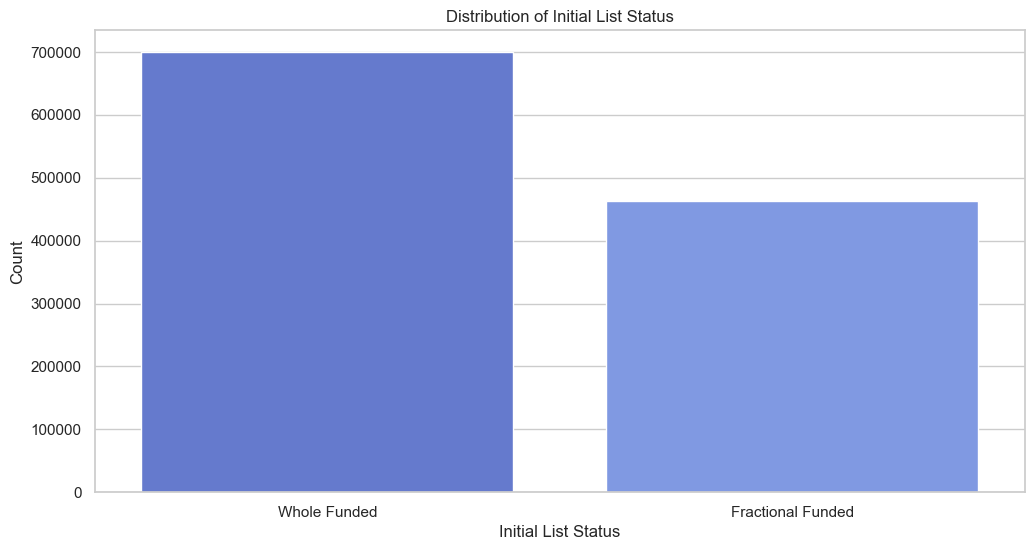

In [98]:
# Distibution of initial_list_status

color_palette = sns.color_palette("coolwarm", len(emp_length_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='initial_list_status', data=df, palette=color_palette)

plt.xlabel('Initial List Status')
plt.ylabel('Count')
plt.title('Distribution of Initial List Status')

plt.show()

In [99]:
df['initial_list_status'].value_counts()

initial_list_status
Whole Funded         699558
Fractional Funded    462873
Name: count, dtype: int64

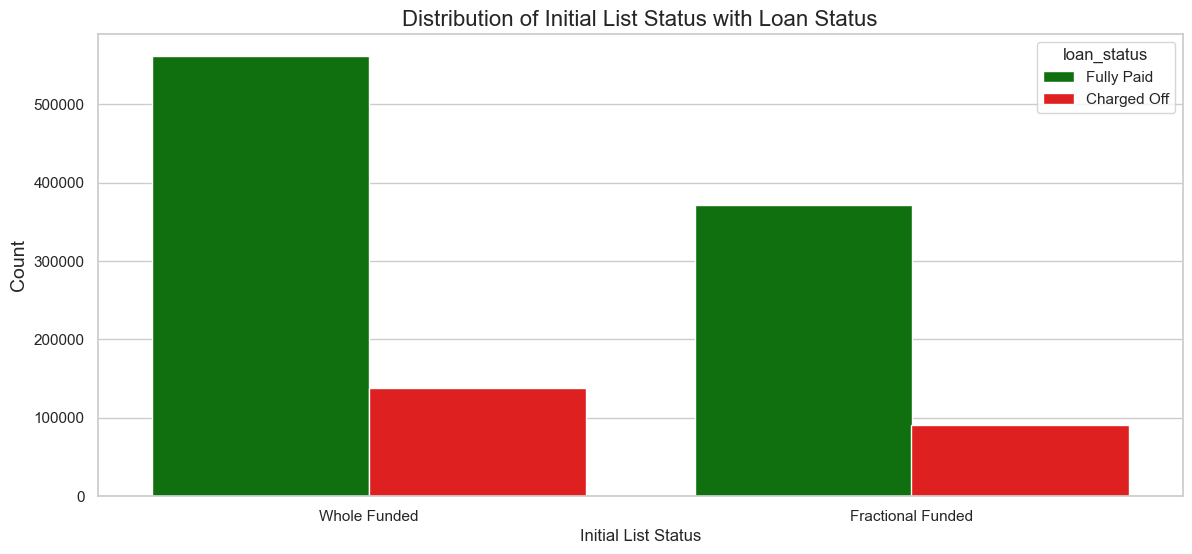

In [100]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='initial_list_status', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('Initial List Status')
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Initial List Status with Loan Status', fontsize=16)

plt.show()

In [101]:
# percentage charged off 
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("initial_list_status").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("initial_list_status").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'Initial_list_Status': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,Initial_list_Status,Percentage Charged Off
0,Fractional Funded,19.64
1,Whole Funded,19.80


percentage charged off based on init_list_status is almost similar so this may not aid us in identifying charge off or defaults. therfore we drop this column

In [102]:
df = df.drop('initial_list_status', axis=1)

### 29. application_type

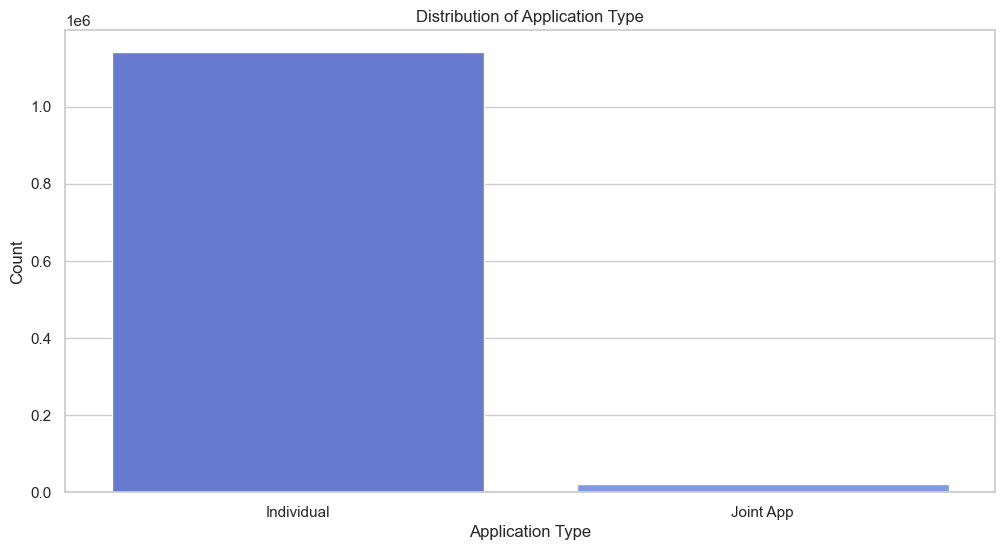

In [103]:
# Distibution of application_type

color_palette = sns.color_palette("coolwarm", len(emp_length_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='application_type', data=df, palette=color_palette)

plt.xlabel('Application Type')
plt.ylabel('Count')
plt.title('Distribution of Application Type')

plt.show()

In [104]:
df['application_type'].value_counts()

application_type
Individual    1141165
Joint App       21266
Name: count, dtype: int64

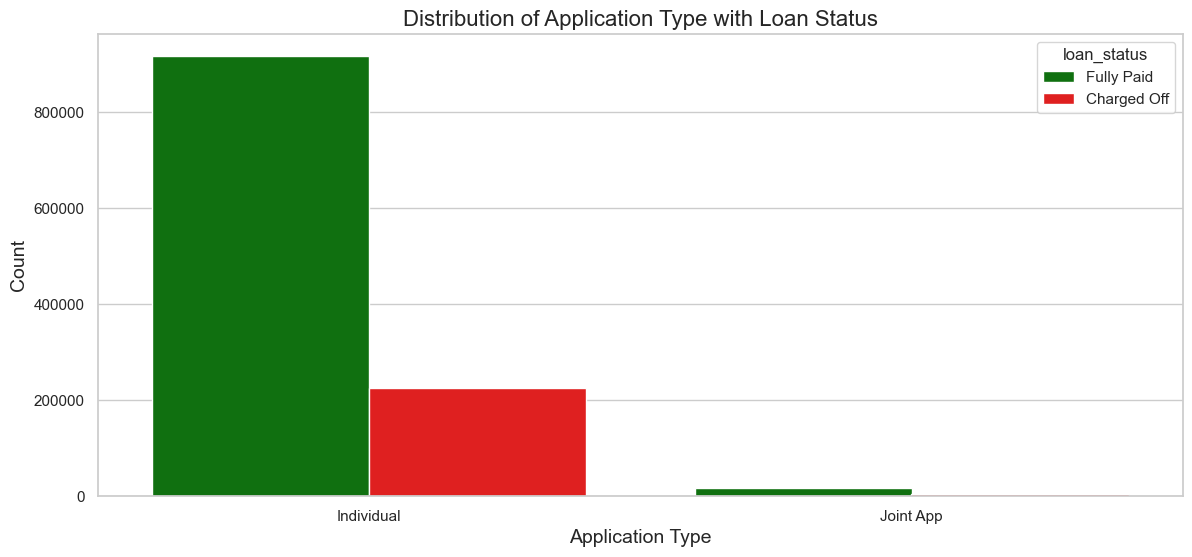

In [105]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='application_type', data=df, hue='loan_status', palette=color_palette)

plt.xlabel('Application Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Application Type with Loan Status', fontsize=16)

plt.show()

In [106]:
# percentage charged off 
charged_off_counts = df[df['loan_status'] == "Charged Off"].groupby("application_type").size()
fully_paid_counts = df[df['loan_status'] == "Fully Paid"].groupby("application_type").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df = pd.DataFrame({'Application Type': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df.reset_index(drop=True, inplace=True)
display(result_df)


,Application Type,Percentage Charged Off
0,Individual,19.67
1,Joint App,23.37


We can clearly see there is a ditiction in loan status based on application_type. So we plan to retain the categorical variable

In [107]:
application_type = pd.get_dummies(df['application_type'], drop_first=True)
df = pd.concat([df.drop('application_type', axis=1), application_type], axis=1)


### 30. mort_acc

In [108]:
df['mort_acc'].describe()

count   1162431.00
mean          1.62
std           1.96
min           0.00
25%           0.00
50%           1.00
75%           3.00
max          37.00
Name: mort_acc, dtype: float64

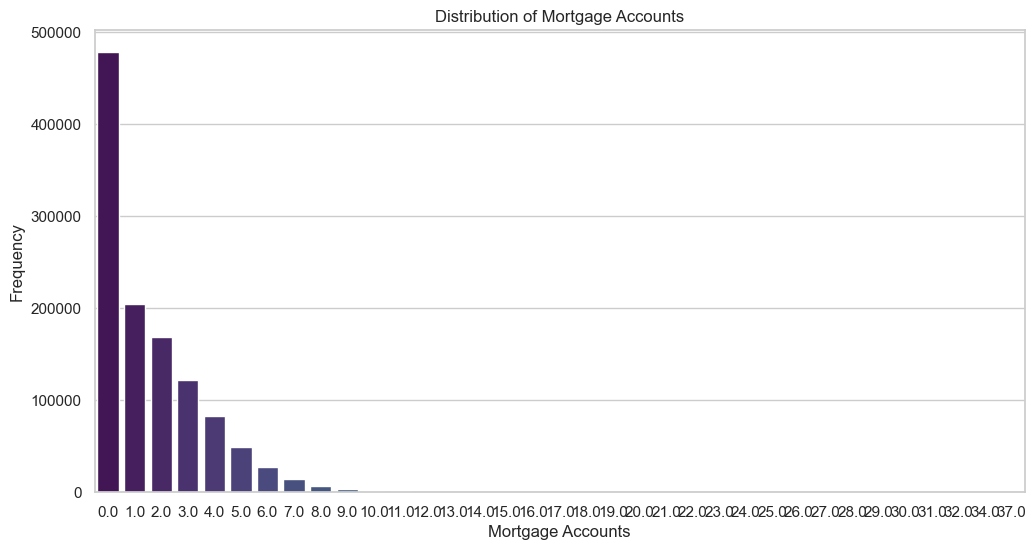

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='mort_acc', palette='viridis')
plt.xlabel('Mortgage Accounts')
plt.ylabel('Frequency')
plt.title('Distribution of Mortgage Accounts')
plt.show()

Mortgage accounts is highly skewed from the right side. In order to handle this we will remove the outliers

In [110]:
# checked for 10, 9, 8 = 0.68% , 7 = 1.30 # Lets remove 8 and 
num_above_8 = df[df['mort_acc'] > 8].shape[0]

# Total number of people
total_people = df.shape[0]

# Calculate the percentage
percentage_above_8 = (num_above_8 / total_people) * 100

print("Percentage of people with mortgage accounts greater than 8: {:.2f}%".format(percentage_above_8))

Percentage of people with mortgage accounts greater than 8: 0.63%


In [111]:
df = df[df['mort_acc'] < 9]

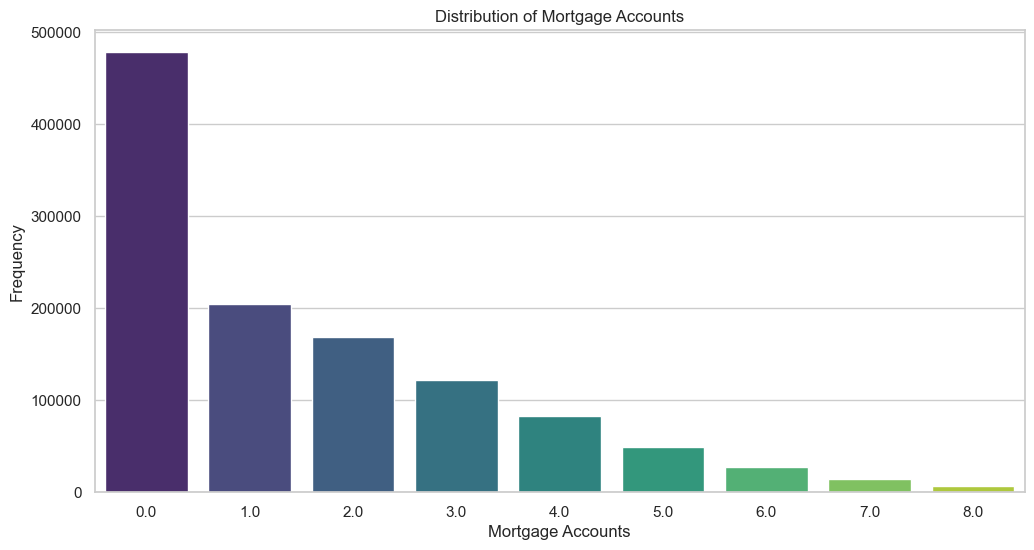

In [112]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='mort_acc', palette='viridis')
plt.xlabel('Mortgage Accounts')
plt.ylabel('Frequency')
plt.title('Distribution of Mortgage Accounts')
plt.show()

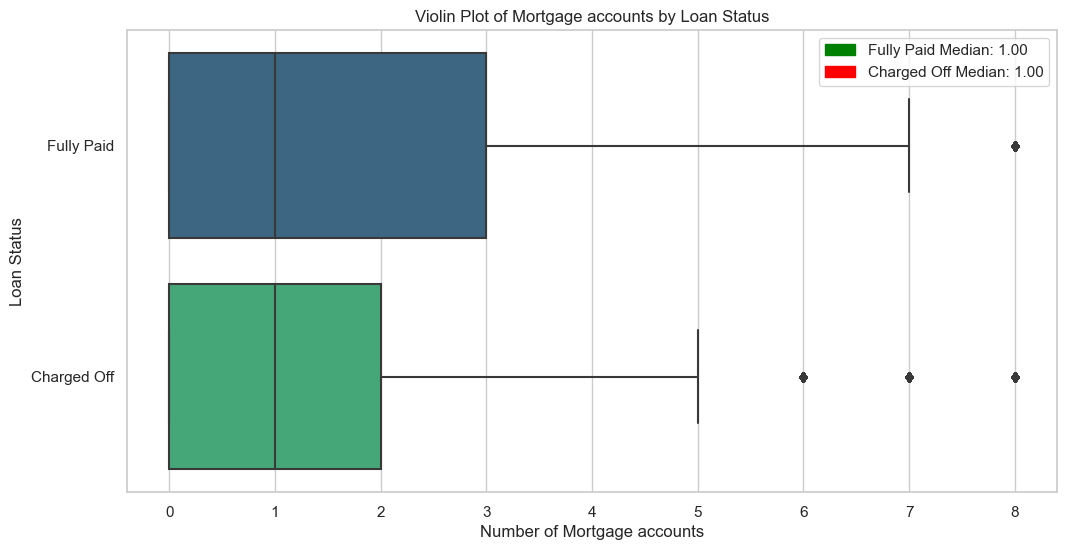

In [113]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='loan_status', x='mort_acc', palette='viridis')

# Calculate medians
fully_paid_median = df[df['loan_status'] == 'Fully Paid']['mort_acc'].median()
charged_off_median = df[df['loan_status'] == 'Charged Off']['mort_acc'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Number of Mortgage accounts')
plt.ylabel('Loan Status')
plt.title('Violin Plot of Mortgage accounts by Loan Status')
plt.show()

Not very clear, though the median is same...I intend to keep it for further analysis

### 31. pub_rec_bankruptcies

In [114]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_values = abs(numeric_columns.corr()['pub_rec_bankruptcies']).sort_values(ascending=False)[1:5]
display(correlation_values)

pub_rec     0.80
fico_avg    0.20
revol_bal   0.16
loan_amnt   0.09
Name: pub_rec_bankruptcies, dtype: float64

The correlation has increase with further cleaning and preprocessing

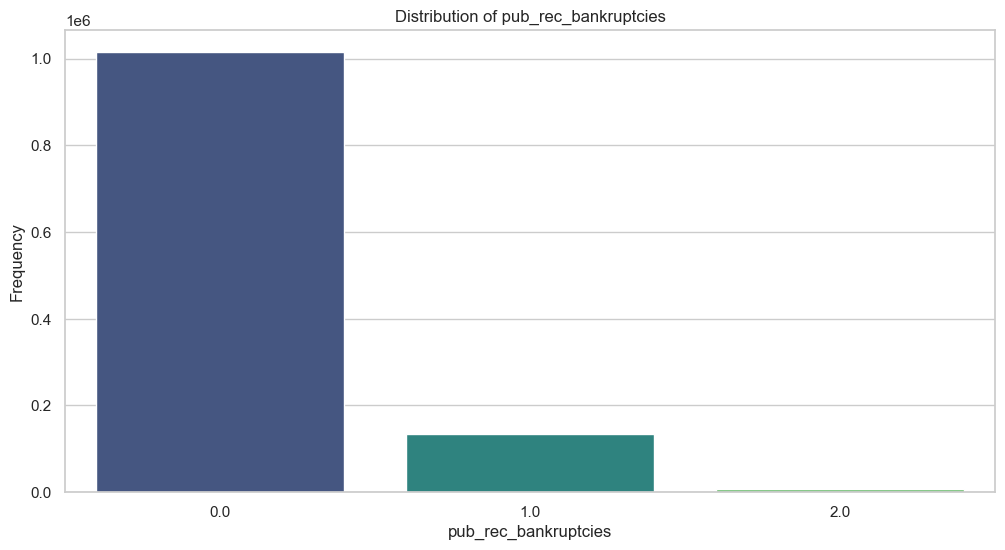

In [115]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='pub_rec_bankruptcies', palette='viridis')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Frequency')
plt.title('Distribution of pub_rec_bankruptcies')
plt.show()

Dropping pub_rec_bankruptcies as it is highly correlated to pub_rec

In [116]:
df = df.drop('pub_rec_bankruptcies', axis=1)